In [3288]:
import numpy as np
import pandas as pd
import datetime as dt
import holidays
import warnings
warnings.filterwarnings('ignore')

In [2989]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

In [2990]:
fs_con = pd.read_csv(r'C:\Users\Gabriel\OneDrive\CUSP\Spring 2022 Classes\Capstone\Data\Flight Schedule w Concourse-Copy1.csv')
fs_con.head()

,Id,Flight Date,Flight Arrving Date Time,Flight Departing Date Time,Flight Date Time,Flight Arriving Time,Flight Departing Time,Date Hour Numeric,PA Time,Non-PA Time,Aircraft Id,Aircraft Code,Airline Id,ICAO Airline,Arriving from Airport Id,Departing to Airport Id,Dep Airport Code,Arr Airport Code,Context Airport Id,Non-Context Airport Id,State Id,Arr Terminal,Dep Terminal,Context Terminal,Flight Direction,Flight No,International Domestic,Mainline Low Cost,Service Type,Flight Type,Seats,Load Factor,Estimated Passenger,Flight Distance,Flight Duration,Valid Destination Indicator,Valid Carrier Indicator,Operating Airline Code,Operating Airline Name,TerminalId,Operating Airline Id,Flight Time,nonpaxratio,TSALoadFactor,Departure Concourse
0,98394474,2021-01-02,2021-01-02T11:25:00.000Z,2021-01-02T11:15:00.000Z,2021-01-02T11:15:00.000Z,1900-01-01T11:25:00.000Z,1900-01-01T11:15:00.000Z,2021010211,1900-01-01T11:15:00.000Z,1900-01-01T11:25:00.000Z,6465,77L,404,AIC,100,116,EWR,DEL,116,100,-1,3,B,B,Departure,106,International,NaN,J,All Passenger Flights,238,0.744576,177,7323,820,1,1,AI,Air India,10,404,1900-01-01T11:15:00.000Z,NaN,NaN,Concourse B-3
1,98394693,2021-01-02,2021-01-02T19:10:00.000Z,2021-01-02T15:10:00.000Z,2021-01-02T15:10:00.000Z,1900-01-01T19:10:00.000Z,1900-01-01T15:10:00.000Z,2021010215,1900-01-01T15:10:00.000Z,1900-01-01T19:10:00.000Z,6392,319,677,AVA,298,116,EWR,SAL,116,298,-1,NaN,B,B,Departure,399,International,NaN,J,All Passenger Flights,120,0.836882,100,2067,300,1,1,TA,Taca International Airlines,10,6105,1900-01-01T15:10:00.000Z,NaN,NaN,Hard Stand
2,98394899,2021-01-01,2021-01-01T08:50:00.000Z,2021-01-01T19:30:00.000Z,2021-01-01T19:30:00.000Z,1900-01-01T08:50:00.000Z,1900-01-01T19:30:00.000Z,2021010119,1900-01-01T19:30:00.000Z,1900-01-01T08:50:00.000Z,6395,321,6110,DJT,254,116,EWR,ORY,116,254,-1,4,B,B,Departure,101,International,NaN,J,All Passenger Flights,76,0.336623,25,3648,440,1,1,B0,La Compagnie,10,6110,1900-01-01T19:30:00.000Z,NaN,NaN,Concourse B-2
3,98394900,2021-01-02,2021-01-02T08:50:00.000Z,2021-01-02T19:30:00.000Z,2021-01-02T19:30:00.000Z,1900-01-01T08:50:00.000Z,1900-01-01T19:30:00.000Z,2021010219,1900-01-01T19:30:00.000Z,1900-01-01T08:50:00.000Z,6395,321,6110,DJT,254,116,EWR,ORY,116,254,-1,4,B,B,Departure,101,International,NaN,J,All Passenger Flights,76,0.336623,25,3648,440,1,1,B0,La Compagnie,10,6110,1900-01-01T19:30:00.000Z,NaN,NaN,Concourse B-2
4,98394985,2021-01-01,2021-01-01T11:00:00.000Z,2021-01-01T21:50:00.000Z,2021-01-01T21:50:00.000Z,1900-01-01T11:00:00.000Z,1900-01-01T21:50:00.000Z,2021010121,1900-01-01T21:50:00.000Z,1900-01-01T11:00:00.000Z,6395,321,6110,DJT,254,116,EWR,ORY,116,254,-1,4,B,B,Departure,103,International,NaN,J,All Passenger Flights,76,0.336623,25,3648,430,1,1,B0,La Compagnie,10,6110,1900-01-01T21:50:00.000Z,NaN,NaN,Concourse B-3


In [2991]:
fs_con.shape

(28308, 45)

In [2992]:
fs_con.dtypes

Id                               int64
Flight Date                     object
Flight Arrving Date Time        object
Flight Departing Date Time      object
Flight Date Time                object
Flight Arriving Time            object
Flight Departing Time           object
Date Hour Numeric                int64
PA Time                         object
Non-PA Time                     object
Aircraft Id                      int64
Aircraft Code                   object
Airline Id                       int64
ICAO Airline                    object
Arriving from Airport Id         int64
Departing to Airport Id          int64
Dep Airport Code                object
Arr Airport Code                object
Context Airport Id               int64
Non-Context Airport Id           int64
State Id                         int64
Arr Terminal                    object
Dep Terminal                    object
Context Terminal                object
Flight Direction                object
Flight No                

In [2993]:
#filter for B concourses
fs = fs_con[fs_con['Departure Concourse'].isin(['Concourse B-1', 'Concourse B-2','Concourse B-3'])]

In [2994]:
#remove the load factor columns - these were not merged properly in the original dataset
fs = fs.drop(['Load Factor',	'Estimated Passenger','nonpaxratio','TSALoadFactor'],axis=1)

In [2995]:
fs['Flight Type'].value_counts()

All Passenger Flights    26023
Name: Flight Type, dtype: int64

In [2996]:
fs = fs.replace({'Departure Concourse':{'Concourse B-1':'B1','Concourse B-2':'B2','Concourse B-3':'B3'}})

In [2997]:
start, stop = 0, 10

fs['Date'] = fs['Flight Departing Date Time'].str.slice(start, stop)

In [2998]:
start, stop = 11, 16

fs['Time'] = fs['Flight Departing Date Time'].str.slice(start, stop)

In [2999]:
fs['DT_sched'] = fs['Date']+' '+fs['Time'].astype(str)
fs['DT_sched'] = pd.to_datetime(fs['DT_sched'], format='%Y-%m-%d %H:%M:%S')

In [3000]:
fs['date'] = fs['DT_sched'].dt.date
fs['Hour'] = fs['DT_sched'].dt.hour

In [3001]:
fs = fs[['Id', 'Aircraft Id', 'Aircraft Code', 'Airline Id',
       'ICAO Airline', 'Arr Airport Code', 'Dep Terminal',
       'Flight No',
       'International Domestic', 
       'Flight Distance', 'Flight Duration', 'Operating Airline Code',
       'Operating Airline Name', 'Operating Airline Id',
       'Flight Time', 'Departure Concourse',
       'Date', 'date','Time', 'DT_sched', 'Hour', 'Seats']]

In [3002]:
fs.head()

,Id,Aircraft Id,Aircraft Code,Airline Id,ICAO Airline,Arr Airport Code,Dep Terminal,Flight No,International Domestic,Flight Distance,Flight Duration,Operating Airline Code,Operating Airline Name,Operating Airline Id,Flight Time,Departure Concourse,Date,date,Time,DT_sched,Hour,Seats
0,98394474,6465,77L,404,AIC,DEL,B,106,International,7323,820,AI,Air India,404,1900-01-01T11:15:00.000Z,B3,2021-01-02,2021-01-02,11:15,2021-01-02 11:15:00,11,238
2,98394899,6395,321,6110,DJT,ORY,B,101,International,3648,440,B0,La Compagnie,6110,1900-01-01T19:30:00.000Z,B2,2021-01-01,2021-01-01,19:30,2021-01-01 19:30:00,19,76
3,98394900,6395,321,6110,DJT,ORY,B,101,International,3648,440,B0,La Compagnie,6110,1900-01-01T19:30:00.000Z,B2,2021-01-02,2021-01-02,19:30,2021-01-02 19:30:00,19,76
4,98394985,6395,321,6110,DJT,ORY,B,103,International,3648,430,B0,La Compagnie,6110,1900-01-01T21:50:00.000Z,B3,2021-01-01,2021-01-01,21:50,2021-01-01 21:50:00,21,76
5,98394986,6395,321,6110,DJT,ORY,B,103,International,3648,430,B0,La Compagnie,6110,1900-01-01T21:50:00.000Z,B3,2021-01-02,2021-01-02,21:50,2021-01-02 21:50:00,21,76


In [3003]:
fs['month'] = fs['DT_sched'].dt.month
fs['year'] = fs['DT_sched'].dt.year

In [3004]:
#filter for 2021 only
fs = fs[fs.year == 2021]

## Group flight times into time of day and day of week

In [3005]:
morning = [6,7,8,9,10,11,12]
afternoon = [13,14,15,16,17]
evening = [18,19,20,21,22]
overnight = [23,0,1,2,3,4,5]

In [ ]:
lsthour = []
for s in fs['Hour']:
        if s in morning:
            lsthour.append('Morning')
        elif s in afternoon:
            lsthour.append('Afternoon')
        elif s in evening:
            lsthour.append('Evening')
        elif s in overnight:
            lsthour.append('Overnight')

In [3006]:
fs['Time Category'] = lsthour

In [3007]:
fs['DOW'] = fs['DT_sched'].dt.weekday
fs['DOW_l'] = fs['DOW'].copy()
fs["DOW_l"].replace({0: "Monday", 1: "Tuesday",2:"Wednesday",3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}, inplace=True)

In [3008]:
fs.head()

,Id,Aircraft Id,Aircraft Code,Airline Id,ICAO Airline,Arr Airport Code,Dep Terminal,Flight No,International Domestic,Flight Distance,Flight Duration,Operating Airline Code,Operating Airline Name,Operating Airline Id,Flight Time,Departure Concourse,Date,date,Time,DT_sched,Hour,Seats,month,year,Time Category,DOW,DOW_l
0,98394474,6465,77L,404,AIC,DEL,B,106,International,7323,820,AI,Air India,404,1900-01-01T11:15:00.000Z,B3,2021-01-02,2021-01-02,11:15,2021-01-02 11:15:00,11,238,1,2021,Morning,5,Saturday
2,98394899,6395,321,6110,DJT,ORY,B,101,International,3648,440,B0,La Compagnie,6110,1900-01-01T19:30:00.000Z,B2,2021-01-01,2021-01-01,19:30,2021-01-01 19:30:00,19,76,1,2021,Evening,4,Friday
3,98394900,6395,321,6110,DJT,ORY,B,101,International,3648,440,B0,La Compagnie,6110,1900-01-01T19:30:00.000Z,B2,2021-01-02,2021-01-02,19:30,2021-01-02 19:30:00,19,76,1,2021,Evening,5,Saturday
4,98394985,6395,321,6110,DJT,ORY,B,103,International,3648,430,B0,La Compagnie,6110,1900-01-01T21:50:00.000Z,B3,2021-01-01,2021-01-01,21:50,2021-01-01 21:50:00,21,76,1,2021,Evening,4,Friday
5,98394986,6395,321,6110,DJT,ORY,B,103,International,3648,430,B0,La Compagnie,6110,1900-01-01T21:50:00.000Z,B3,2021-01-02,2021-01-02,21:50,2021-01-02 21:50:00,21,76,1,2021,Evening,5,Saturday


## Add new column for Holidays and holiday weekends

In [3169]:
#import US holidays (for NY and NJ) from the holidays library
hds = holidays.US(subdiv = 'NY',years = [2021,2022]) + holidays.US(subdiv = 'NJ',years = [2021,2022])

In [3170]:
for date, name in sorted(hds.items()):
    print(date, name, date.weekday())

2021-01-01 New Year's Day 4
2021-01-18 Martin Luther King Jr. Day 0
2021-02-12 Lincoln's Birthday 4
2021-02-15 Washington's Birthday 0
2021-04-02 Good Friday 4
2021-05-31 Memorial Day 0
2021-06-18 Juneteenth National Independence Day (Observed) 4
2021-06-19 Juneteenth National Independence Day 5
2021-07-04 Independence Day 6
2021-07-05 Independence Day (Observed) 0
2021-09-06 Labor Day 0
2021-10-11 Columbus Day 0
2021-11-02 Election Day 1
2021-11-11 Veterans Day 3
2021-11-25 Thanksgiving 3
2021-12-24 Christmas Day (Observed) 4
2021-12-25 Christmas Day 5
2021-12-31 New Year's Day (Observed) 4
2022-01-01 New Year's Day 5
2022-01-17 Martin Luther King Jr. Day 0
2022-02-11 Lincoln's Birthday (Observed) 4
2022-02-12 Lincoln's Birthday 5
2022-02-15 Susan B. Anthony Day 1
2022-02-21 Washington's Birthday 0
2022-04-15 Good Friday 4
2022-05-30 Memorial Day 0
2022-06-19 Juneteenth National Independence Day 6
2022-06-20 Juneteenth National Independence Day (Observed) 0
2022-07-04 Independence Day

In [3172]:
#days surrounding the holidays also tend to have higher demand. Identify the surrounding days.
fl_hds = []
for date, name in sorted(hds.items()):
    if (name == 'Christmas Day') | (name == 'Thanksgiving') | (name == "New Year's Day"):
    # for the big holidays, we would expect to see increased travel on the 3 days before and after
        fl_hds.append(date - dt.timedelta(1))
        fl_hds.append(date - dt.timedelta(2))
        fl_hds.append(date - dt.timedelta(3))
        fl_hds.append(date + dt.timedelta(1))
        fl_hds.append(date + dt.timedelta(2))
        fl_hds.append(date + dt.timedelta(3))
    elif date.weekday() == 0:
    # for Monday holidays, we would expect to see increased travel on the Friday, Saturday, and Sunday prior
        fl_hds.append(date - dt.timedelta(1))
        fl_hds.append(date - dt.timedelta(2))
        fl_hds.append(date - dt.timedelta(3))
    elif date.weekday() == 4:
    # for Friday holidays, we would expect to see increased travel on the Saturday and Sunday after
        fl_hds.append(date + dt.timedelta(1))
        fl_hds.append(date + dt.timedelta(2))
    

In [3173]:
#if the departure date is in the list of holidays, mark as a 1 or if the departure date is in the list of days surrounding holidays, also mark as a 1
fs['holiday'] = 0
for i in fs.index:
    if fs.loc[i,'DT_sched'] in hds:
        fs.loc[i,'holiday'] = 1
    elif fs.loc[i,'DT_sched'].date() in fl_hds:
        fs.loc[i,'holiday'] = 1

In [3175]:
#export to csv a list of 2021 and 2022 holidays
for h in fl_hds:
    if (h not in hds.keys()) & (h.year >=2021):
        hds.append({h:"Holiday Weekend"})

In [3207]:
hdays = pd.DataFrame(hds.items(), columns = ['date','holiday'])
hdays['date'] = pd.to_datetime(hdays['date'])
hdays = hdays.sort_values('date').reset_index(drop=True)
hdays['dow'] = hdays['date'].dt.dayofweek
hdays.head()

,date,holiday,dow
0,2021-01-01,New Year's Day,4
1,2021-01-02,Holiday Weekend,5
2,2021-01-03,Holiday Weekend,6
3,2021-01-04,Holiday Weekend,0
4,2021-01-15,Holiday Weekend,4


In [3208]:
hdays.to_csv(r'C:\Users\Gabriel\OneDrive\CUSP\Spring 2022 Classes\Capstone\PANYNJ-codebase\LookupTables\holidays2021-22.csv')

## Merge aircraft codes for ICAO and BTS

In [3014]:
# I had to create this lookup table manually, referring to the following sources:
# 1) the T-100 data itself, which has the Aircraft Type Desc_1
# 2) the BTS website provides this lookup table for BTS Aircraft Type Desc_2 and the BTS Aircraft Type Code: https://transtats.bts.gov/Download_Lookup.asp?Y11x72=Y_NVePeNSg_glcR
# 3) https://en.wikipedia.org/wiki/List_of_aircraft_type_designators
# 4) https://www.avcodes.co.uk/acrtypes.asp
# 5) The FAA Airplane Design Groups (ADG), which is used to classify plane size based on wingspan and height. It is a good enough approximation for seat capacity categories. https://www.faa.gov/airports/engineering/aircraft_char_database/
# Note that there is not always a 1-to-1 match, and a few of the BTS values did not correspond perfectly with the ICAO/IATA codes.
aircraft_codes = pd.read_csv(r'C:\Users\Gabriel\OneDrive\CUSP\Spring 2022 Classes\Capstone\Data\LookupTables\Aircraft_Lookup.csv')
aircraft_codes.head()

,BTS Aircraft Type Desc_1,BTS Aircraft Type Desc_2,BTS Aircraft Type Code,ICAO Aircraft Code,IATA Aircraft Code,ADG
0,AIRBUS INDUSTRIE A220-100,Airbus Industrie A330-300,687,BCS1,221,III
1,AIRBUS INDUSTRIE A220-300,A220-300 BD-500-1A11,724,BCS3,223,III
2,AIRBUS INDUSTRIE A300-600/R/CF/RCF,Airbus Industrie A300-600/R/CF/RCF,691,A306,AB6,IV
3,AIRBUS INDUSTRIE A300-B2,Airbus Industrie A300-B2,695,A30B,AB4,IV
4,AIRBUS INDUSTRIE A319,Airbus Industrie A319,698,A319,319,III


In [3015]:
fs = pd.merge(left=fs, right=aircraft_codes,how='left',left_on='Aircraft Code', right_on = 'IATA Aircraft Code')
fs.head()

,Id,Aircraft Id,Aircraft Code,Airline Id,ICAO Airline,Arr Airport Code,Dep Terminal,Flight No,International Domestic,Flight Distance,Flight Duration,Operating Airline Code,Operating Airline Name,Operating Airline Id,Flight Time,Departure Concourse,Date,date,Time,DT_sched,Hour,Seats,month,year,Time Category,DOW,DOW_l,holiday,BTS Aircraft Type Desc_1,BTS Aircraft Type Desc_2,BTS Aircraft Type Code,ICAO Aircraft Code,IATA Aircraft Code,ADG
0,98394474,6465,77L,404,AIC,DEL,B,106,International,7323,820,AI,Air India,404,1900-01-01T11:15:00.000Z,B3,2021-01-02,2021-01-02,11:15,2021-01-02 11:15:00,11,238,1,2021,Morning,5,Saturday,1,BOEING 777-200/200LR,Boeing 777-200ER/200LR/233LR,627,B772,77L,V
1,98394899,6395,321,6110,DJT,ORY,B,101,International,3648,440,B0,La Compagnie,6110,1900-01-01T19:30:00.000Z,B2,2021-01-01,2021-01-01,19:30,2021-01-01 19:30:00,19,76,1,2021,Evening,4,Friday,1,AIRBUS INDUSTRIE A321,Airbus Industrie A321-200n,721,A321,321,III
2,98394900,6395,321,6110,DJT,ORY,B,101,International,3648,440,B0,La Compagnie,6110,1900-01-01T19:30:00.000Z,B2,2021-01-02,2021-01-02,19:30,2021-01-02 19:30:00,19,76,1,2021,Evening,5,Saturday,1,AIRBUS INDUSTRIE A321,Airbus Industrie A321-200n,721,A321,321,III
3,98394985,6395,321,6110,DJT,ORY,B,103,International,3648,430,B0,La Compagnie,6110,1900-01-01T21:50:00.000Z,B3,2021-01-01,2021-01-01,21:50,2021-01-01 21:50:00,21,76,1,2021,Evening,4,Friday,1,AIRBUS INDUSTRIE A321,Airbus Industrie A321-200n,721,A321,321,III
4,98394986,6395,321,6110,DJT,ORY,B,103,International,3648,430,B0,La Compagnie,6110,1900-01-01T21:50:00.000Z,B3,2021-01-02,2021-01-02,21:50,2021-01-02 21:50:00,21,76,1,2021,Evening,5,Saturday,1,AIRBUS INDUSTRIE A321,Airbus Industrie A321-200n,721,A321,321,III


In [3016]:
# merge worked well - no N/As
fs['BTS Aircraft Type Code'].isna().sum()

0

## Merge destination region

In [3017]:
# the destination data is available at https://ourairports.com/data/
# the regions were manually assigned based on Gabe's discretion. Domestic flights are divided into northeast, southeast, midwest, plains, and west coast/pacific.
# Canada is its own region. Central America and Caribbean were grouped together with South America. Otherwise, the region corresponds to the continent.

airport_lookup = pd.read_csv(r'C:\Users\Gabriel\OneDrive\CUSP\Spring 2022 Classes\Capstone\Data\LookupTables\airport-codes.csv')
airport_lookup.head()

,ident,type,name,elevation_ft,continent,iso_country,iso_region,municipality,gps_code,iata_code,local_code,coordinates,US State,US Region,Region
0,00A,heliport,Total Rf Heliport,11.0,NaN,US,US-PA,Bensalem,00A,NaN,00A,"-74.93360137939453, 40.07080078125",PA,Northeast,USA-Northeast
1,00AA,small_airport,Aero B Ranch Airport,3435.0,NaN,US,US-KS,Leoti,00AA,NaN,00AA,"-101.473911, 38.704022",KS,Plains,USA-Plains
2,00AK,small_airport,Lowell Field,450.0,NaN,US,US-AK,Anchor Point,00AK,NaN,00AK,"-151.695999146, 59.94919968",AK,Pacific West,USA-Pacific West
3,00AL,small_airport,Epps Airpark,820.0,NaN,US,US-AL,Harvest,00AL,NaN,00AL,"-86.77030181884766, 34.86479949951172",AL,Southeast,USA-Southeast
4,00AR,closed,Newport Hospital & Clinic Heliport,237.0,NaN,US,US-AR,Newport,NaN,NaN,NaN,"-91.254898, 35.6087",AR,Southeast,USA-Southeast


In [3018]:
fs = pd.merge(fs, airport_lookup[['iata_code','Region']],left_on = 'Arr Airport Code',right_on = 'iata_code', how='left')

## Merge airline category

In [3019]:
# Airlines were grouped into low-cost carriers (LC) and traditional carriers (TR)
# the data source for this classification is based on the ICAO List of Low-Cost-Carriers: https://www.icao.int/sustainability/documents/lcc-list.pdf
# A few manual adjustments were made for known LCCs, e.g. French Bee, that is not in the ICAO list.

al_lookup = pd.read_csv(r'C:\Users\Gabriel\OneDrive\CUSP\Spring 2022 Classes\Capstone\Data\LookupTables\Airlines Mapping.csv')
al_lookup.head()

,Marketing Airline Desc,Marketing Airline IATA Code,Marketing Airline ICAO Code,Marketing Airline Country,Type
0,ABC Aerolineas,4O,AIJ,Mexico,LC
1,Aer Lingus,EI,EIN,Ireland,TR
2,Aeroenlaces Nacionales,VB,VIV,Mexico,LC
3,Aeroflot Russian Airlines,SU,AFL,Russia,TR
4,Aerolineas Argentinas,AR,ARG,Argentina,TR


In [3020]:
fs = pd.merge(fs, al_lookup[['Marketing Airline IATA Code','Marketing Airline ICAO Code','Type']], how= 'left', left_on = 'ICAO Airline', right_on = 'Marketing Airline ICAO Code').rename({'Marketing Airline IATA Code':'airline_iata','Type':'airline_type','Marketing Airline ICAO Code':'airline_icao'},axis=1)

In [3021]:
fs.head()

,Id,Aircraft Id,Aircraft Code,Airline Id,ICAO Airline,Arr Airport Code,Dep Terminal,Flight No,International Domestic,Flight Distance,Flight Duration,Operating Airline Code,Operating Airline Name,Operating Airline Id,Flight Time,Departure Concourse,Date,date,Time,DT_sched,Hour,Seats,month,year,Time Category,DOW,DOW_l,holiday,BTS Aircraft Type Desc_1,BTS Aircraft Type Desc_2,BTS Aircraft Type Code,ICAO Aircraft Code,IATA Aircraft Code,ADG,iata_code,Region,airline_iata,airline_icao,airline_type
0,98394474,6465,77L,404,AIC,DEL,B,106,International,7323,820,AI,Air India,404,1900-01-01T11:15:00.000Z,B3,2021-01-02,2021-01-02,11:15,2021-01-02 11:15:00,11,238,1,2021,Morning,5,Saturday,1,BOEING 777-200/200LR,Boeing 777-200ER/200LR/233LR,627,B772,77L,V,DEL,Asia,AI,AIC,TR
1,98394899,6395,321,6110,DJT,ORY,B,101,International,3648,440,B0,La Compagnie,6110,1900-01-01T19:30:00.000Z,B2,2021-01-01,2021-01-01,19:30,2021-01-01 19:30:00,19,76,1,2021,Evening,4,Friday,1,AIRBUS INDUSTRIE A321,Airbus Industrie A321-200n,721,A321,321,III,ORY,Europe,B0,DJT,TR
2,98394900,6395,321,6110,DJT,ORY,B,101,International,3648,440,B0,La Compagnie,6110,1900-01-01T19:30:00.000Z,B2,2021-01-02,2021-01-02,19:30,2021-01-02 19:30:00,19,76,1,2021,Evening,5,Saturday,1,AIRBUS INDUSTRIE A321,Airbus Industrie A321-200n,721,A321,321,III,ORY,Europe,B0,DJT,TR
3,98394985,6395,321,6110,DJT,ORY,B,103,International,3648,430,B0,La Compagnie,6110,1900-01-01T21:50:00.000Z,B3,2021-01-01,2021-01-01,21:50,2021-01-01 21:50:00,21,76,1,2021,Evening,4,Friday,1,AIRBUS INDUSTRIE A321,Airbus Industrie A321-200n,721,A321,321,III,ORY,Europe,B0,DJT,TR
4,98394986,6395,321,6110,DJT,ORY,B,103,International,3648,430,B0,La Compagnie,6110,1900-01-01T21:50:00.000Z,B3,2021-01-02,2021-01-02,21:50,2021-01-02 21:50:00,21,76,1,2021,Evening,5,Saturday,1,AIRBUS INDUSTRIE A321,Airbus Industrie A321-200n,721,A321,321,III,ORY,Europe,B0,DJT,TR


## Merge Daily Vaccination Data

In [3022]:
vax = pd.read_csv(r'C:\Users\Gabriel\OneDrive\CUSP\Spring 2022 Classes\Capstone\Data\CDC Vaccine Daily.csv',skipfooter=3)
vax.head()

c:\Users\Gabriel\anaconda3\envs\ADS2\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,date,Total Administered Doses,Total Completed Vaccinations
0,"Sunday, December 13, 2020",0,0
1,"Monday, December 14, 2020",509,0
2,"Tuesday, December 15, 2020",12129,0
3,"Wednesday, December 16, 2020",38996,0
4,"Thursday, December 17, 2020",75708,0


In [3023]:
vax.date = pd.to_datetime(vax.date).dt.date

In [3024]:
vax.sort_values(by='date',inplace=True)
vax['total_doses'] = vax['Total Administered Doses'].cumsum()

In [3025]:
fs = pd.merge(fs, vax[['date','total_doses']], how= 'left', left_on = 'date', right_on = 'date')

## T-100 data download from BTS portal

In [3026]:
#downloaded from https://transtats.bts.gov/DL_SelectFields.aspx?gnoyr_VQ=FMG&QO_fu146_anzr=Nv4+Pn44vr45
t1 = pd.read_csv(r'C:\Users\Gabriel\OneDrive\CUSP\Spring 2022 Classes\Capstone\Data\T_T100_SEGMENT_ALL_CARRIER.csv')
t1.head()

,DEPARTURES_SCHEDULED,DEPARTURES_PERFORMED,SEATS,PASSENGERS,DISTANCE,UNIQUE_CARRIER,AIRLINE_ID,UNIQUE_CARRIER_NAME,UNIQUE_CARRIER_ENTITY,REGION,CARRIER,CARRIER_NAME,CARRIER_GROUP,CARRIER_GROUP_NEW,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_COUNTRY,DEST_COUNTRY_NAME,DEST_WAC,AIRCRAFT_GROUP,AIRCRAFT_TYPE,AIRCRAFT_CONFIG,YEAR,QUARTER,MONTH,CLASS,DATA_SOURCE
0,0.0,1.0,0.0,0.0,740.0,QF,19566,Qantas Airways Ltd.,9802A,I,QF,Qantas Airways Ltd.,0,0,13930,ORD,12478,1247805,31703,JFK,"New York, NY",NY,36.0,New York,US,United States,22,8,821,2,2021,3,9,G,DF
1,0.0,3.0,0.0,0.0,1744.0,QF,19566,Qantas Airways Ltd.,9802A,I,QF,Qantas Airways Ltd.,0,0,13930,ORD,12892,1289208,32575,LAX,"Los Angeles, CA",CA,6.0,California,US,United States,91,8,821,2,2021,3,9,G,DF
2,0.0,6.0,0.0,0.0,4243.0,QF,19566,Qantas Airways Ltd.,9802A,I,QF,Qantas Airways Ltd.,0,0,13930,ORD,12173,1217305,32134,HNL,"Honolulu, HI",HI,15.0,Hawaii,US,United States,2,8,821,2,2021,3,9,G,DF
3,0.0,4.0,0.0,0.0,801.0,QF,19566,Qantas Airways Ltd.,9802A,I,QF,Qantas Airways Ltd.,0,0,13930,ORD,11298,1129806,30194,DFW,"Dallas/Fort Worth, TX",TX,48.0,Texas,US,United States,74,8,821,2,2021,3,9,G,DF
4,0.0,2.0,0.0,0.0,9201.0,QF,19566,Qantas Airways Ltd.,9802A,I,QF,Qantas Airways Ltd.,0,0,15092,SYD,13930,1393007,30977,ORD,"Chicago, IL",IL,17.0,Illinois,US,United States,41,8,821,2,2021,3,9,G,IF


In [3027]:
# filter for Newark departures only
t1 = t1[t1['ORIGIN'] == 'EWR']

t1.shape

(7128, 35)

In [3028]:
# filter out freight-only flights, flights with fewer than 10 seats or 10 passengers - these are more likely to be reporting errors/outliers than actual, very small flights (which won't have a huge impact anyway)

#AIRCRAFT_CONFIG refers to cargo/passengers. Passenger flights have config == 1 or 3
t1 = t1[(t1.AIRCRAFT_CONFIG == 1) | (t1.AIRCRAFT_CONFIG == 3)]

t1 = t1[t1.SEATS > 10]
t1 = t1[t1.PASSENGERS > 10]

t1.shape

(6116, 35)

In [3029]:
# convert t100 aircraft_type field to a string to match the corresponding data type in flight schedule
t1['AIRCRAFT_TYPE'] = t1['AIRCRAFT_TYPE'].astype(str)

In [3030]:
# merge in the aircraft lookup codes
t1 = pd.merge(left=t1,right=aircraft_codes,left_on = 'AIRCRAFT_TYPE',right_on = 'BTS Aircraft Type Code',how='left')

In [3031]:
# analysis showed that airlines interchange similar aircraft sometimes.
# In aggregate, the total reported flights from EWR to a given destination, on a given airline, in a given month was pretty similar to the scheduled flights.
# However, instead of flying half on aircraft A and half on aircraft B, as scheduled, they actually flew 90% on aircraft A and only 10% on aircraft B, where A and B are very similar types of aircraft
# Therefore, we will group T100 data by the Airplane Design Group (ADG) before merging

t1g = t1[['DEPARTURES_PERFORMED', 'SEATS', 'PASSENGERS',
       'DISTANCE', 'CARRIER', 'CARRIER_NAME',
       'DEST',
       'DEST_CITY_NAME', 'DEST_COUNTRY_NAME', 
       'YEAR', 'MONTH', 'ADG']].groupby(by=['CARRIER','DEST','YEAR','MONTH','ADG'],as_index=False).agg({
              'DEPARTURES_PERFORMED':'sum','SEATS':'sum','PASSENGERS':'sum','DISTANCE':'mean','CARRIER_NAME':'min','DEST_CITY_NAME':'min','DEST_COUNTRY_NAME':'min'})
t1g

,CARRIER,DEST,YEAR,MONTH,ADG,DEPARTURES_PERFORMED,SEATS,PASSENGERS,DISTANCE,CARRIER_NAME,DEST_CITY_NAME,DEST_COUNTRY_NAME
0,09Q,AEX,2021,1,III,1.0,149.0,36.0,1212.0,"Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...","Alexandria, LA",United States
1,09Q,AEX,2021,7,III,5.0,825.0,50.0,1212.0,"Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...","Alexandria, LA",United States
2,09Q,AEX,2021,8,III,4.0,600.0,125.0,1212.0,"Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...","Alexandria, LA",United States
3,09Q,AEX,2021,9,III,1.0,149.0,29.0,1212.0,"Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...","Alexandria, LA",United States
4,09Q,AEX,2021,11,III,3.0,450.0,116.0,1212.0,"Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...","Alexandria, LA",United States
...,...,...,...,...,...,...,...,...,...,...,...,...
3384,YX,YUL,2021,12,III,49.0,3580.0,2579.0,331.0,Republic Airline,"Montreal, Canada",Canada
3385,YX,YYZ,2021,9,III,23.0,1742.0,1398.0,348.0,Republic Airline,"Toronto, Canada",Canada
3386,YX,YYZ,2021,10,III,31.0,2332.0,1856.0,348.0,Republic Airline,"Toronto, Canada",Canada
3387,YX,YYZ,2021,11,III,27.0,2028.0,1380.0,348.0,Republic Airline,"Toronto, Canada",Canada


In [3032]:
# create columns for seats per flight, monthly average pax per flight, and average load factor
t1g['seatsxfl'] = t1g['SEATS'] / t1g['DEPARTURES_PERFORMED']
t1g['paxxfl_mavg'] = t1g['PASSENGERS'] / t1g['DEPARTURES_PERFORMED']
t1g['lf_mavg'] = t1g['PASSENGERS'] / t1g['SEATS']

## Merge the T100 data and assess

In [3033]:
# merge the load factor data into the flight schedule data
mg = pd.merge(left=fs, right = t1g, left_on = ['Operating Airline Code','year','month','Arr Airport Code','ADG'],right_on = ['CARRIER','YEAR','MONTH','DEST','ADG'],how='left',indicator=True)
mg._merge.value_counts()

both          17883
left_only      1947
right_only        0
Name: _merge, dtype: int64

In [3034]:
mg.head()

,Id,Aircraft Id,Aircraft Code,Airline Id,ICAO Airline,Arr Airport Code,Dep Terminal,Flight No,International Domestic,Flight Distance,Flight Duration,Operating Airline Code,Operating Airline Name,Operating Airline Id,Flight Time,Departure Concourse,Date,date,Time,DT_sched,Hour,Seats,month,year,Time Category,DOW,DOW_l,holiday,BTS Aircraft Type Desc_1,BTS Aircraft Type Desc_2,BTS Aircraft Type Code,ICAO Aircraft Code,IATA Aircraft Code,ADG,iata_code,Region,airline_iata,airline_icao,airline_type,total_doses,CARRIER,DEST,YEAR,MONTH,DEPARTURES_PERFORMED,SEATS,PASSENGERS,DISTANCE,CARRIER_NAME,DEST_CITY_NAME,DEST_COUNTRY_NAME,seatsxfl,paxxfl_mavg,lf_mavg,_merge
0,98394474,6465,77L,404,AIC,DEL,B,106,International,7323,820,AI,Air India,404,1900-01-01T11:15:00.000Z,B3,2021-01-02,2021-01-02,11:15,2021-01-02 11:15:00,11,238,1,2021,Morning,5,Saturday,1,BOEING 777-200/200LR,Boeing 777-200ER/200LR/233LR,627,B772,77L,V,DEL,Asia,AI,AIC,TR,4745800,AI,DEL,2021.0,1.0,37.0,11718.0,7258.0,7324.0,National Aviation Company of India Limited d/b...,"Delhi, India",India,316.702703,196.162162,0.619389,both
1,98394899,6395,321,6110,DJT,ORY,B,101,International,3648,440,B0,La Compagnie,6110,1900-01-01T19:30:00.000Z,B2,2021-01-01,2021-01-01,19:30,2021-01-01 19:30:00,19,76,1,2021,Evening,4,Friday,1,AIRBUS INDUSTRIE A321,Airbus Industrie A321-200n,721,A321,321,III,ORY,Europe,B0,DJT,TR,4438527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,98394900,6395,321,6110,DJT,ORY,B,101,International,3648,440,B0,La Compagnie,6110,1900-01-01T19:30:00.000Z,B2,2021-01-02,2021-01-02,19:30,2021-01-02 19:30:00,19,76,1,2021,Evening,5,Saturday,1,AIRBUS INDUSTRIE A321,Airbus Industrie A321-200n,721,A321,321,III,ORY,Europe,B0,DJT,TR,4745800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3,98394985,6395,321,6110,DJT,ORY,B,103,International,3648,430,B0,La Compagnie,6110,1900-01-01T21:50:00.000Z,B3,2021-01-01,2021-01-01,21:50,2021-01-01 21:50:00,21,76,1,2021,Evening,4,Friday,1,AIRBUS INDUSTRIE A321,Airbus Industrie A321-200n,721,A321,321,III,ORY,Europe,B0,DJT,TR,4438527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
4,98394986,6395,321,6110,DJT,ORY,B,103,International,3648,430,B0,La Compagnie,6110,1900-01-01T21:50:00.000Z,B3,2021-01-02,2021-01-02,21:50,2021-01-02 21:50:00,21,76,1,2021,Evening,5,Saturday,1,AIRBUS INDUSTRIE A321,Airbus Industrie A321-200n,721,A321,321,III,ORY,Europe,B0,DJT,TR,4745800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


## Data quality checks on the merge
Compare the number of flights in the flight schedule vs. the number reported in T100.
Ultimately, the load factor/number of passengers is what we really care about, but if the T100 data is dramatically under-reporting flights, it calls into question the load factor data for those records.

In [3035]:
#for every unique value in each of the merge fields of the flight schedule,
# confirm that the same value exists in the corresponding field of the T100
# compare the number of flights in the flight schedule vs. the number of flights performed according to T100

In [3036]:
# group the flight schedule data so that it is comparable format to the T100 data (i.e. monthly)
fs_gx = fs[['Flight No','Seats','Operating Airline Code','year','month','Arr Airport Code','ADG','Region','airline_type']].groupby(by=['Operating Airline Code','year','month','Arr Airport Code','ADG'],as_index=False).agg({'Region':'min','airline_type':'min','Flight No':'count','Seats':'sum'})
fs_gx

,Operating Airline Code,year,month,Arr Airport Code,ADG,Region,airline_type,Flight No,Seats
0,9E,2021,1,CVG,III,USA-Midwest,TR,16,1216
1,9E,2021,1,DTW,III,USA-Midwest,TR,9,684
2,9E,2021,1,MSP,III,USA-Midwest,TR,87,6612
3,9E,2021,2,CVG,III,USA-Midwest,TR,14,1064
4,9E,2021,2,MSP,III,USA-Midwest,TR,78,5928
...,...,...,...,...,...,...,...,...,...
626,TP,2021,11,LIS,V,Europe,TR,32,9536
627,TP,2021,11,OPO,V,Europe,TR,10,2980
628,TP,2021,12,LIS,III,Europe,TR,42,7056
629,TP,2021,12,LIS,V,Europe,TR,33,9747


In [3037]:
# T100 data is already grouped monthly, but we are going to group the aircraft type into the ADG categories so we need to group the T100 data too
t1_gx = t1g[['DEPARTURES_PERFORMED','CARRIER','YEAR','MONTH','DEST','ADG','SEATS','PASSENGERS']].groupby(by=['CARRIER','YEAR','MONTH','DEST','ADG'],as_index=False).sum()
t1_gx

,CARRIER,YEAR,MONTH,DEST,ADG,DEPARTURES_PERFORMED,SEATS,PASSENGERS
0,09Q,2021,1,AEX,III,1.0,149.0,36.0
1,09Q,2021,1,BUF,III,1.0,150.0,49.0
2,09Q,2021,1,CVG,III,1.0,150.0,25.0
3,09Q,2021,1,IAD,III,1.0,150.0,49.0
4,09Q,2021,1,IND,III,2.0,300.0,55.0
...,...,...,...,...,...,...,...,...
3384,YX,2021,12,SYR,III,27.0,1908.0,1406.0
3385,YX,2021,12,TPA,III,1.0,76.0,75.0
3386,YX,2021,12,XNA,III,28.0,2062.0,1271.0
3387,YX,2021,12,YUL,III,49.0,3580.0,2579.0


In [3038]:
# merge the 2 tables to compare
comp = pd.merge(left=fs_gx,right=t1_gx,left_on=['Operating Airline Code','year','month','Arr Airport Code','ADG'], right_on = ['CARRIER','YEAR','MONTH','DEST','ADG'], how = 'left')
comp.DEPARTURES_PERFORMED.fillna(0,inplace=True)
comp

,Operating Airline Code,year,month,Arr Airport Code,ADG,Region,airline_type,Flight No,Seats,CARRIER,YEAR,MONTH,DEST,DEPARTURES_PERFORMED,SEATS,PASSENGERS
0,9E,2021,1,CVG,III,USA-Midwest,TR,16,1216,9E,2021.0,1.0,CVG,16.0,1214.0,459.0
1,9E,2021,1,DTW,III,USA-Midwest,TR,9,684,9E,2021.0,1.0,DTW,9.0,672.0,411.0
2,9E,2021,1,MSP,III,USA-Midwest,TR,87,6612,9E,2021.0,1.0,MSP,87.0,6579.0,3195.0
3,9E,2021,2,CVG,III,USA-Midwest,TR,14,1064,9E,2021.0,2.0,CVG,12.0,912.0,377.0
4,9E,2021,2,MSP,III,USA-Midwest,TR,78,5928,9E,2021.0,2.0,MSP,73.0,5548.0,2689.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626,TP,2021,11,LIS,V,Europe,TR,32,9536,TP,2021.0,11.0,LIS,1.0,269.0,138.0
627,TP,2021,11,OPO,V,Europe,TR,10,2980,NaN,NaN,NaN,NaN,0.0,NaN,NaN
628,TP,2021,12,LIS,III,Europe,TR,42,7056,NaN,NaN,NaN,NaN,0.0,NaN,NaN
629,TP,2021,12,LIS,V,Europe,TR,33,9747,TP,2021.0,12.0,LIS,3.0,807.0,586.0


In [3039]:
#percentage difference between number of departures in the flight schedule and T100 data
comp['flacc'] = (comp['Flight No'] - comp['DEPARTURES_PERFORMED']) / comp['Flight No']

<AxesSubplot:>

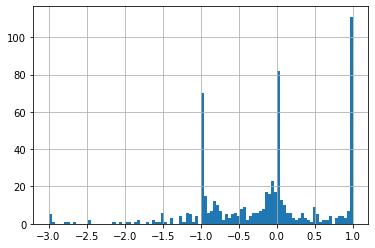

In [ ]:
# a value of zero means that they are perfectly aligned.
# Negative values means that the T100 data reported more flights than the flight schedule. This isn't a big issue, but I'll look at some of the larger negative values.
# The positive values indicate that the T100 data is under-reported compared with FS. In particular, a value of 1 indicates that no flights were reported for that airline-month-destination-aircraft combination.
comp.flacc.hist(bins = 100, range = [-3,1])

c:\Users\Gabriel\anaconda3\envs\ADS2\lib\site-packages\IPython\core\displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


<AxesSubplot:>

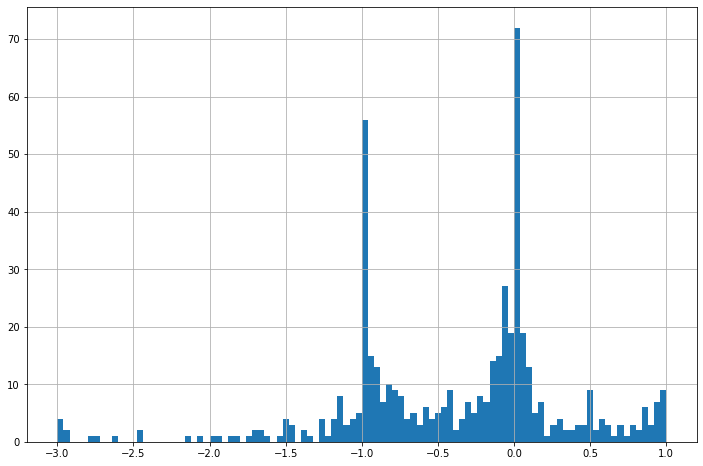

In [3040]:
#percentage difference between number of seats in the flight schedule and T100 data
comp['seatacc'] = (comp['Seats'] - comp['SEATS']) / comp['Seats']
comp.seatacc.hist(bins = 100, range = [-3,1])

This histogram actually shows that the under-reported flights in the T100 data actually don't account for a large number of seats. The same histogram for count of flights showed a large peak at 1.0, which indicated that some airlines didn't report certain month-destination-aircraft combinations. However, this histogram shows that that large peak at 1.0 corresponds to a relatively small number of passengers.

We still see a large peak at 0.0 which is what we want. We also still have a peak at -1.0 which indicates over-reporting by exactly double from the flight schedule. Again, this is ultimately not a big concern because we are really just looking for a representative load factor, so as long as there are enough flights reported, we can trust the reported load factor.

In [3041]:
# if the accuracy value is greater than 0.5, which means that the T100 data contains less than half of the flights in the flight schedule,
# we should view those records with suspicion. The safer option is to overwrite those rows using aggregated/group averages
# these are the reliable records
rel = comp[comp.flacc < 0.5]
rel.head()

,Operating Airline Code,year,month,Arr Airport Code,ADG,Region,airline_type,Flight No,Seats,CARRIER,YEAR,MONTH,DEST,DEPARTURES_PERFORMED,SEATS,PASSENGERS,flacc,seatacc
0,9E,2021,1,CVG,III,USA-Midwest,TR,16,1216,9E,2021.0,1.0,CVG,16.0,1214.0,459.0,0.000000,0.001645
1,9E,2021,1,DTW,III,USA-Midwest,TR,9,684,9E,2021.0,1.0,DTW,9.0,672.0,411.0,0.000000,0.017544
2,9E,2021,1,MSP,III,USA-Midwest,TR,87,6612,9E,2021.0,1.0,MSP,87.0,6579.0,3195.0,0.000000,0.004991
3,9E,2021,2,CVG,III,USA-Midwest,TR,14,1064,9E,2021.0,2.0,CVG,12.0,912.0,377.0,0.142857,0.142857
4,9E,2021,2,MSP,III,USA-Midwest,TR,78,5928,9E,2021.0,2.0,MSP,73.0,5548.0,2689.0,0.064103,0.064103


In [3042]:
# group reliable records by year, month, destination region, ADG, and airline type. 
# This higher-level aggregation will allow us to re-apply the averages to the missing / suspiciously sparse T100 records
rel_x = rel[['year','month','ADG','Region','airline_type','DEPARTURES_PERFORMED','SEATS','PASSENGERS']].groupby(by=['year','month','ADG','Region','airline_type'],as_index=False).sum()
rel_x.head()

,year,month,ADG,Region,airline_type,DEPARTURES_PERFORMED,SEATS,PASSENGERS
0,2021,1,III,Latin America & Caribbean,LC,16.0,2936.0,2041.0
1,2021,1,III,Latin America & Caribbean,TR,17.0,2340.0,621.0
2,2021,1,III,USA-Midwest,LC,2.0,372.0,214.0
3,2021,1,III,USA-Midwest,TR,112.0,8465.0,4065.0
4,2021,1,III,USA-Northeast,LC,18.0,3276.0,1138.0


In [3043]:
# create columns for seats per flight, monthly average pax per flight, and average load factor
rel_x['seatsxfl'] = rel_x['SEATS'] / rel_x['DEPARTURES_PERFORMED']
rel_x['paxxfl_mavg'] = rel_x['PASSENGERS'] / rel_x['DEPARTURES_PERFORMED']
rel_x['lf_mavg'] = rel_x['PASSENGERS'] / rel_x['SEATS']
rel_x.head()

,year,month,ADG,Region,airline_type,DEPARTURES_PERFORMED,SEATS,PASSENGERS,seatsxfl,paxxfl_mavg,lf_mavg
0,2021,1,III,Latin America & Caribbean,LC,16.0,2936.0,2041.0,183.500000,127.562500,0.695163
1,2021,1,III,Latin America & Caribbean,TR,17.0,2340.0,621.0,137.647059,36.529412,0.265385
2,2021,1,III,USA-Midwest,LC,2.0,372.0,214.0,186.000000,107.000000,0.575269
3,2021,1,III,USA-Midwest,TR,112.0,8465.0,4065.0,75.580357,36.294643,0.480213
4,2021,1,III,USA-Northeast,LC,18.0,3276.0,1138.0,182.000000,63.222222,0.347375


In [3044]:
# create a group ID to make merging easier
rel_x['gid'] = rel_x.year.astype(str) + rel_x.month.astype(str) + rel_x.Region + rel_x.airline_type + rel_x.ADG
rel_x.head()

,year,month,ADG,Region,airline_type,DEPARTURES_PERFORMED,SEATS,PASSENGERS,seatsxfl,paxxfl_mavg,lf_mavg,gid
0,2021,1,III,Latin America & Caribbean,LC,16.0,2936.0,2041.0,183.500000,127.562500,0.695163,20211Latin America & CaribbeanLCIII
1,2021,1,III,Latin America & Caribbean,TR,17.0,2340.0,621.0,137.647059,36.529412,0.265385,20211Latin America & CaribbeanTRIII
2,2021,1,III,USA-Midwest,LC,2.0,372.0,214.0,186.000000,107.000000,0.575269,20211USA-MidwestLCIII
3,2021,1,III,USA-Midwest,TR,112.0,8465.0,4065.0,75.580357,36.294643,0.480213,20211USA-MidwestTRIII
4,2021,1,III,USA-Northeast,LC,18.0,3276.0,1138.0,182.000000,63.222222,0.347375,20211USA-NortheastLCIII


In [3045]:
# create a specific ID too
rel['sid'] = rel.year.astype(str) + rel.month.astype(str) + rel.DEST + rel.CARRIER + rel.ADG
rel.head()

C:\Users\Gabriel\AppData\Local\Temp/ipykernel_36008/1975989393.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rel['sid'] = rel.year.astype(str) + rel.month.astype(str) + rel.DEST + rel.CARRIER + rel.ADG


,Operating Airline Code,year,month,Arr Airport Code,ADG,Region,airline_type,Flight No,Seats,CARRIER,YEAR,MONTH,DEST,DEPARTURES_PERFORMED,SEATS,PASSENGERS,flacc,seatacc,sid
0,9E,2021,1,CVG,III,USA-Midwest,TR,16,1216,9E,2021.0,1.0,CVG,16.0,1214.0,459.0,0.000000,0.001645,20211CVG9EIII
1,9E,2021,1,DTW,III,USA-Midwest,TR,9,684,9E,2021.0,1.0,DTW,9.0,672.0,411.0,0.000000,0.017544,20211DTW9EIII
2,9E,2021,1,MSP,III,USA-Midwest,TR,87,6612,9E,2021.0,1.0,MSP,87.0,6579.0,3195.0,0.000000,0.004991,20211MSP9EIII
3,9E,2021,2,CVG,III,USA-Midwest,TR,14,1064,9E,2021.0,2.0,CVG,12.0,912.0,377.0,0.142857,0.142857,20212CVG9EIII
4,9E,2021,2,MSP,III,USA-Midwest,TR,78,5928,9E,2021.0,2.0,MSP,73.0,5548.0,2689.0,0.064103,0.064103,20212MSP9EIII


In [3046]:
mg['gid'] = mg.year.astype(str) + mg.month.astype(str) + mg.Region + mg.airline_type + mg.ADG
mg['sid'] = mg.year.astype(str) + mg.month.astype(str) + mg['Arr Airport Code'] + mg.airline_iata + mg.ADG

In [3047]:
# look through mg dataset to find records that are not in the rel dataset, based on their SPECIFIC criteria. Those are the unreliable records. 
# Then use the grouped reliable records in the rel_x dataset to overwrite the unreliable values.

In [3048]:
# merge in the averages of the reliable records
mg = pd.merge(mg,rel_x[['gid','seatsxfl','paxxfl_mavg','lf_mavg']], left_on = 'gid', right_on = 'gid', how='left')
mg.rename({'seatsxfl_y':'seatsxfl_avg',	'paxxfl_mavg_y':'paxxfl_mavg_avg',	'lf_mavg_y':'lf_mavg_avg'},axis=1,inplace=True)

In [3049]:
# for the unreliable records, use the average values
mg['SeatsxFl'] = np.where(mg['sid'].isin(rel.sid),mg['seatsxfl_x'],mg['seatsxfl_avg'])
mg['PaxxFl'] = np.where(mg['sid'].isin(rel.sid),mg['paxxfl_mavg_x'],mg['paxxfl_mavg_avg'])
mg['lf'] = np.where(mg['sid'].isin(rel.sid),mg['lf_mavg_x'],mg['lf_mavg_avg'])

In [3050]:
# still have some flights without load factor data
mg.lf.isna().sum()

559

In [3051]:
# use annual averages to fill in more of the NAs
for i in mg.index:
    if pd.isnull(mg.loc[i,'lf']):
        y = mg.loc[i,'year']
        r = mg.loc[i,'Region']
        adg = mg.loc[i,'ADG']
        alt = mg.loc[i,'airline_type']
        mg.loc[i,'SeatsxFl'] = mg.loc[(mg.year == y) & (mg.Region == r) & (mg.ADG == adg) & (mg.airline_type == alt),'seatsxfl_x'].mean()
        mg.loc[i,'PaxxFl'] = mg.loc[(mg.year == y) & (mg.Region == r) & (mg.ADG == adg) & (mg.airline_type == alt),'paxxfl_mavg_x'].mean()
        mg.loc[i,'lf'] = mg.loc[(mg.year == y) & (mg.Region == r) & (mg.ADG == adg) & (mg.airline_type == alt),'lf_mavg_x'].mean()

In [3052]:
# use international vs. domestic averages to fill in more NAs
for i in mg.index:
    if pd.isnull(mg.loc[i,'lf']):
        y = mg.loc[i,'year']
        di = mg.loc[i,'International Domestic']
        adg = mg.loc[i,'ADG']
        alt = mg.loc[i,'airline_type']
        mg.loc[i,'SeatsxFl'] = mg.loc[(mg.year == y) & (mg['International Domestic'] == di) & (mg.ADG == adg) & (mg.airline_type == alt),'seatsxfl_x'].mean()
        mg.loc[i,'PaxxFl'] = mg.loc[(mg.year == y) & (mg['International Domestic'] == di) & (mg.ADG == adg) & (mg.airline_type == alt),'paxxfl_mavg_x'].mean()
        mg.loc[i,'lf'] = mg.loc[(mg.year == y) & (mg['International Domestic'] == di) & (mg.ADG == adg) & (mg.airline_type == alt),'lf_mavg_x'].mean()

In [3053]:
# use aircraft type averages to fill in more NAs
for i in mg.index:
    if pd.isnull(mg.loc[i,'lf']):
        y = mg.loc[i,'year']
        adg = mg.loc[i,'ADG']
        mg.loc[i,'SeatsxFl'] = mg.loc[(mg.year == y) & (mg.ADG == adg),'seatsxfl_x'].mean()
        mg.loc[i,'PaxxFl'] = mg.loc[(mg.year == y) & (mg.ADG == adg),'paxxfl_mavg_x'].mean()
        mg.loc[i,'lf'] = mg.loc[(mg.year == y) & (mg.ADG == adg),'lf_mavg_x'].mean()

In [3054]:
# The remaining missing values are because the T100 data doesn't contain data for any ADG Type VI aircraft, i.e. A380s and Boeing 747-8.
# All of those remaining in the 2021 FS data are Lufthansa flights to Frankfurt on Boeing 747-8s. 
# Upon closer inspection of the T100 data, it appears that Lufthansa reported these scheduled 747-8 flights as A330s, a smaller, type V aircraft, 
# because there are more reported Type V flights in the T100 data than on the flight schedule.
# Regardless, we need to be able to handle Type VI aircraft. According to wikipedia, the passenger capacity of a 747-8 is 467 passengers.
# The only other Type VI aircraft, the A380, is too big to fit in the gates at Newark airport, so no A380s are used.
# Therefore, we will use the 747-8 capacity of 467 as the SeatsxFl field for all Type VI aircraft, and use the load factor of similar Type V aircrafts to determine the PaxxFl.

for i in mg.index:
    if mg.loc[i,'ADG'] == 'VI':

        mg.loc[i,'SeatsxFl'] = 467


        y = mg.loc[i,'year']
        r = mg.loc[i,'Region']
        adg = 'V'
        alt = mg.loc[i,'airline_type']
        mg.loc[i,'lf'] = mg.loc[(mg.year == y) & (mg['Region'] == r) & (mg.ADG == adg) & (mg.airline_type == alt),'lf_mavg_x'].mean()
        mg.loc[i,'PaxxFl'] = mg.loc[i,'lf'] * mg.loc[i,'SeatsxFl']

In [3055]:
# finally, all load factors are filled
mg.lf.isna().sum()

0

## Use FS Seats and T100 reported load factor to calculate total passengers per flight

When I initially wrote this code, I thought that the Seats column in the flight schedule came from the T100 data, but Rohun informed me that it actually is reported directly from the airlines to PANYNJ, which makes it much more reliable than the T100 data. So we will use the reported load factor x actual seats

In [3057]:
mg.SeatsxFl.sum()

3535644.642772695

In [3058]:
# Check the T100 total seats after merge with the total seats in the FS
mg.Seats.sum()

3676461

This is good - shows that the T100 SeatsxFl, after merging with the flight schedule, is pretty close to the actual total number of seats in the flight schedule.

In [3060]:
#create a new column for PAX that is based on the actual seat count and reported load factor
mg['PAX'] = mg.lf * mg.Seats

## Compare the passenger/load factor data with blip data

In [3062]:
# first check the distribution of load factors across all scheduled flights in 2021
mg.lf.describe()

count    19830.000000
mean         0.714727
std          0.183434
min          0.052878
25%          0.583232
50%          0.767857
75%          0.868644
max          0.992105
Name: lf, dtype: float64

<AxesSubplot:>

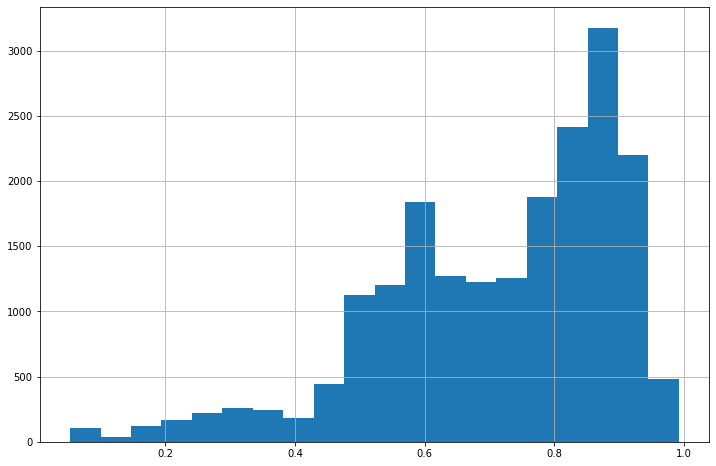

In [3063]:
# looks reasonable, a bit higher than expected. I expected most flights to have load factors between 0.6 and 0.8, but this isn't unrealistic.
mg.lf.hist(bins=20)

In [3066]:
#import TSA bliptrack data
blip = pd.read_csv(r'C:\Users\Gabriel\OneDrive\CUSP\Spring 2022 Classes\Capstone\Data\BlipTrack PC CUSP Export.csv',skipfooter = 3)
blip.head()

c:\Users\Gabriel\anaconda3\envs\ADS2\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,Date,Military Hour,PA Airport Code,Terminal Desc,Location Hierarchy - Location Type,Location Hierarchy - Sensor Area,Total People Count
0,1/1/2021,0,EWR,EWR-Terminal B,TSA,TB1-TSA,1
1,1/1/2021,0,EWR,EWR-Terminal B,TSA,TB3-TSA,17
2,1/1/2021,1,EWR,EWR-Terminal B,TSA,TB1-TSA,4
3,1/1/2021,1,EWR,EWR-Terminal B,TSA,TB3-TSA,3
4,1/1/2021,2,EWR,EWR-Terminal B,TSA,TB3-TSA,10


In [3070]:
blip.Date = pd.to_datetime(blip.Date)

In [3071]:
blip.rename({'Location Hierarchy - Sensor Area':'Concourse'},axis = 1, inplace=True)
blip['Concourse'].value_counts()

TB3-TSA    8746
TB1-TSA    7953
TB2-TSA    4983
Name: Concourse, dtype: int64

In [3072]:
tsa = pd.read_csv(r'C:\Users\Gabriel\OneDrive\CUSP\Spring 2022 Classes\Capstone\Data\TSA CUSP Export.csv',skipfooter=3)
tsa.head()

c:\Users\Gabriel\anaconda3\envs\ADS2\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,Date,Military Hour,PA Airport Code,Terminal,Checkpoint,Act Pax Hourly
0,1/1/2021,0,EWR,Terminal B,Terminal B/3,3
1,1/1/2021,1,EWR,Terminal B,Terminal B/3,0
2,1/1/2021,2,EWR,Terminal B,Terminal B/3,0
3,1/1/2021,3,EWR,Terminal B,Terminal B/3,1
4,1/1/2021,4,EWR,Terminal B,Terminal B/1,264


In [3073]:
tsa.dtypes

Date               object
Military Hour       int64
PA Airport Code    object
Terminal           object
Checkpoint         object
Act Pax Hourly     object
dtype: object

In [3074]:
# recast variables
tsa['Act Pax Hourly'] = pd.to_numeric(tsa['Act Pax Hourly'].str.replace(',',''))
tsa.Date = pd.to_datetime(tsa.Date)

In [3075]:
# total number of passengers departing terminal B for 2021 based on flight schedule and load factors
mg.PAX.sum()

2556826.425936906

In [3076]:
# total number of passengers moving through TSA in 2021 based on bliptrack
blip['Total People Count'].sum()

2831493

In [3077]:
# total number of passengers moving through TSA in 2021 based on TSA
tsa['Act Pax Hourly'].sum()

2984885

In [3078]:
# daily passenger counts by concourse based on flight schedule/load factor
pax_dly_fs = mg[['date', 'Departure Concourse','PAX']].pivot_table(values = 'PAX',index='date',columns='Departure Concourse',aggfunc='sum',fill_value=0)
pax_dly_fs['fs_total'] = pax_dly_fs.B1 + pax_dly_fs.B2 + pax_dly_fs.B3
pax_dly_fs

Departure Concourse,B1,B2,B3,fs_total
date,,,,
2021-01-01,3054.237447,305.061377,1122.581414,4481.880237
2021-01-02,3664.998756,305.061377,1794.396253,5764.456385
2021-01-03,3755.420283,48.889948,1370.526850,5174.837081
2021-01-04,3728.351418,48.889948,1143.563126,4920.804492
2021-01-05,3435.445442,48.889948,1287.899366,4772.234757
...,...,...,...,...
2021-12-27,4988.238938,2918.737476,3028.373977,10935.350391
2021-12-28,5491.645984,2874.772979,2921.288822,11287.707785
2021-12-29,5538.152250,2199.134353,3536.235411,11273.522014


In [3079]:
pax_dly_blip = blip[['Date','Concourse', 'Total People Count']].pivot_table(values='Total People Count',index='Date',columns='Concourse',aggfunc='sum',fill_value=0)
pax_dly_blip['blip_total'] = pax_dly_blip['TB1-TSA'] + pax_dly_blip['TB2-TSA'] + pax_dly_blip['TB3-TSA']
pax_dly_blip

Concourse,TB1-TSA,TB2-TSA,TB3-TSA,blip_total
Date,,,,
2021-01-01,2878,1,1297,4176
2021-01-02,3895,1,2109,6005
2021-01-03,3972,1,1915,5888
2021-01-04,3511,0,1279,4790
2021-01-05,2988,1,1510,4499
...,...,...,...,...
2021-12-27,6106,2852,2703,11661
2021-12-28,6346,2712,2923,11981
2021-12-29,6291,2252,3502,12045


In [3080]:
pax_dly_tsa = tsa[['Date','Checkpoint', 'Act Pax Hourly']].pivot_table(values='Act Pax Hourly',index='Date',columns='Checkpoint',aggfunc='sum',fill_value=0)
pax_dly_tsa['tsa_total'] = pax_dly_tsa['Terminal B/1'] + pax_dly_tsa['Terminal B/2'] + pax_dly_tsa['Terminal B/3']
pax_dly_tsa

Checkpoint,Terminal B/1,Terminal B/2,Terminal B/3,tsa_total
Date,,,,
2021-01-01,3373,0,1172,4545
2021-01-02,4448,0,2049,6497
2021-01-03,4710,0,1730,6440
2021-01-04,3956,0,1209,5165
2021-01-05,3071,0,1293,4364
...,...,...,...,...
2021-12-27,6372,3376,2985,12733
2021-12-28,6712,3041,3081,12834
2021-12-29,6603,2516,3802,12921


In [3081]:
pax_dly = pd.merge(left=pax_dly_fs,right=pax_dly_blip, how='outer',left_index=True,right_index=True)
pax_dly = pd.merge(left=pax_dly,right=pax_dly_tsa, how='outer',left_index=True,right_index=True)
pax_dly

,B1,B2,B3,fs_total,TB1-TSA,TB2-TSA,TB3-TSA,blip_total,Terminal B/1,Terminal B/2,Terminal B/3,tsa_total
Date,,,,,,,,,,,,
2021-01-01,3054.237447,305.061377,1122.581414,4481.880237,2878,1,1297,4176,3373,0,1172,4545
2021-01-02,3664.998756,305.061377,1794.396253,5764.456385,3895,1,2109,6005,4448,0,2049,6497
2021-01-03,3755.420283,48.889948,1370.526850,5174.837081,3972,1,1915,5888,4710,0,1730,6440
2021-01-04,3728.351418,48.889948,1143.563126,4920.804492,3511,0,1279,4790,3956,0,1209,5165
2021-01-05,3435.445442,48.889948,1287.899366,4772.234757,2988,1,1510,4499,3071,0,1293,4364
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,4988.238938,2918.737476,3028.373977,10935.350391,6106,2852,2703,11661,6372,3376,2985,12733
2021-12-28,5491.645984,2874.772979,2921.288822,11287.707785,6346,2712,2923,11981,6712,3041,3081,12834
2021-12-29,5538.152250,2199.134353,3536.235411,11273.522014,6291,2252,3502,12045,6603,2516,3802,12921


In [3082]:
pax_dly['month'] = list(pd.Series(pax_dly.index).dt.month)

In [3083]:
pax_mly = pax_dly.groupby('month').sum()
pax_mly

,B1,B2,B3,fs_total,TB1-TSA,TB2-TSA,TB3-TSA,blip_total,Terminal B/1,Terminal B/2,Terminal B/3,tsa_total
month,,,,,,,,,,,,
1,74461.206920,6934.996084,23214.057793,104610.260798,76866,307,36024,113197,83062,0,26372,109434
2,82331.681741,2068.809897,15469.831034,99870.322672,73547,356,28993,102896,74311,0,18040,92351
3,116690.759583,325.859987,33727.519569,150744.139139,106308,517,45109,151934,126889,0,34321,161210
4,121857.390486,195.852664,37376.754367,159429.997518,65151,337,55030,120518,133580,0,46552,180132
5,145663.640533,380.886969,47957.130110,194001.657612,152688,320,70168,223176,158209,0,62345,220554
6,137004.828779,1951.892639,90523.727055,229480.448473,147537,395,110137,258069,155170,0,108810,263980
7,181342.174395,25352.709314,106911.392663,313606.276372,193392,31200,119946,344538,192275,31845,118455,342575
8,180555.848708,23437.114850,87786.588467,291779.552025,168449,25807,110468,304724,176603,26915,109732,313250
9,130372.941972,14648.798808,43328.871355,188350.612134,121920,22149,90305,234374,158645,18502,80736,257883


<AxesSubplot:xlabel='month'>

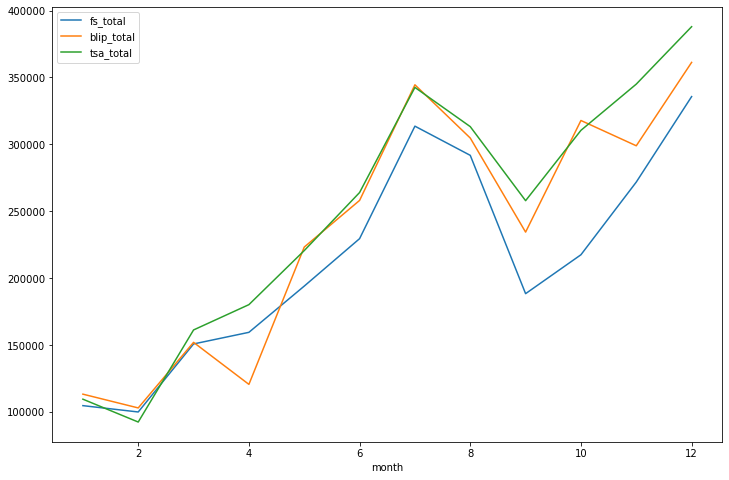

In [3084]:
#compare the monthly passenger counts
pax_mly[['fs_total','blip_total', 'tsa_total']].plot()

<AxesSubplot:xlabel='month'>

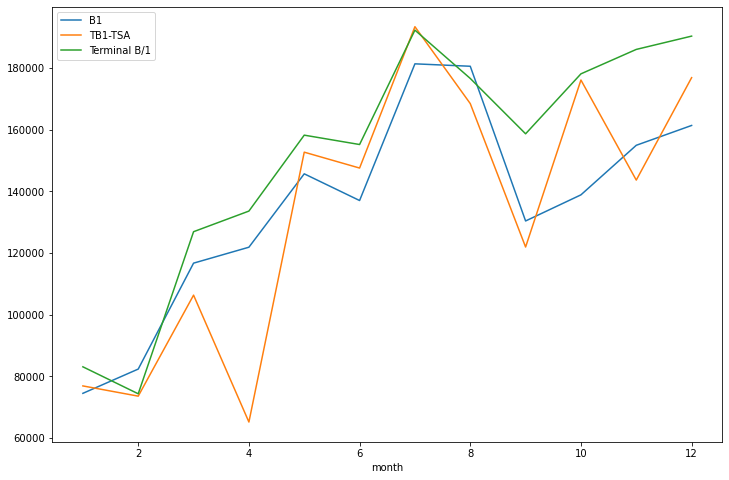

In [3085]:
pax_mly[['B1','TB1-TSA','Terminal B/1']].plot()

<AxesSubplot:xlabel='month'>

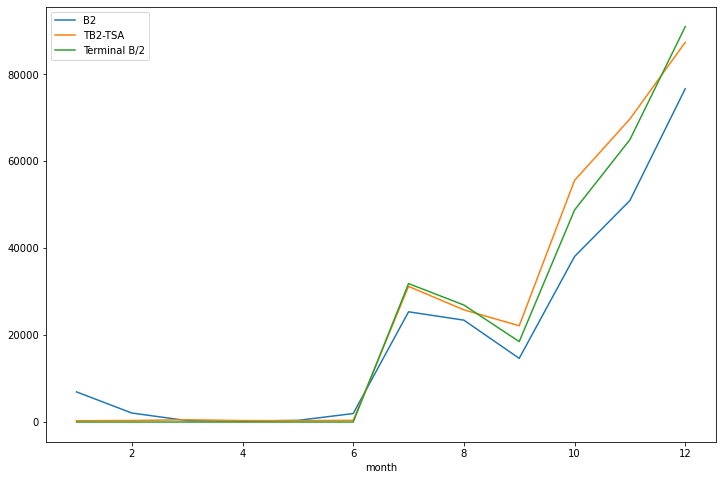

In [3086]:
pax_mly[['B2','TB2-TSA','Terminal B/2']].plot()

<AxesSubplot:xlabel='month'>

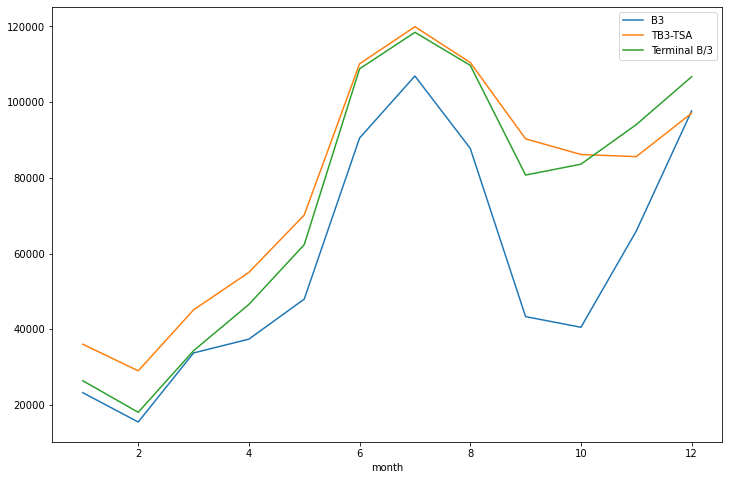

In [3087]:
pax_mly[['B3','TB3-TSA','Terminal B/3']].plot()

<AxesSubplot:xlabel='Date'>

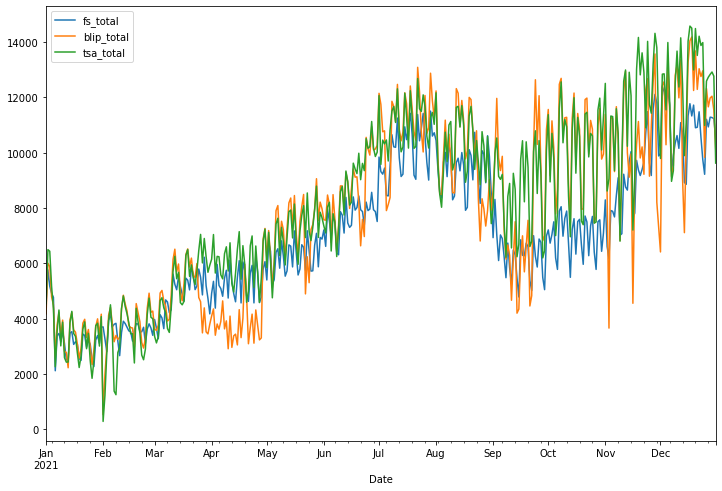

In [3088]:
#daily passenger counts
pax_dly[['fs_total','blip_total','tsa_total']].plot()

<AxesSubplot:xlabel='Date'>

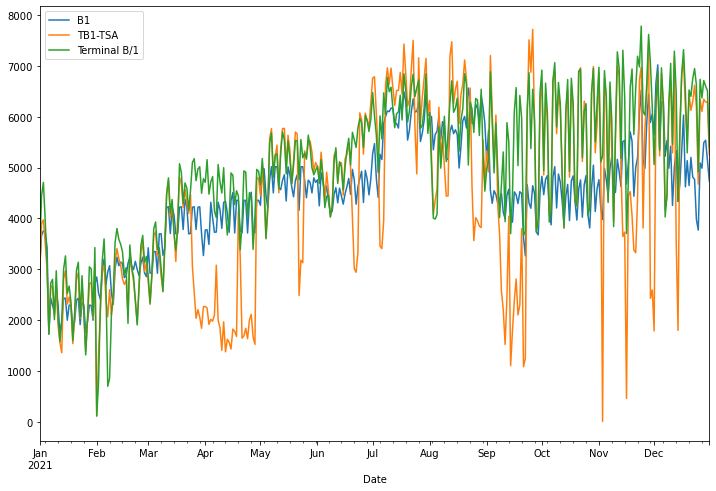

In [3089]:
pax_dly[['B1','TB1-TSA','Terminal B/1']].plot()

<AxesSubplot:xlabel='Date'>

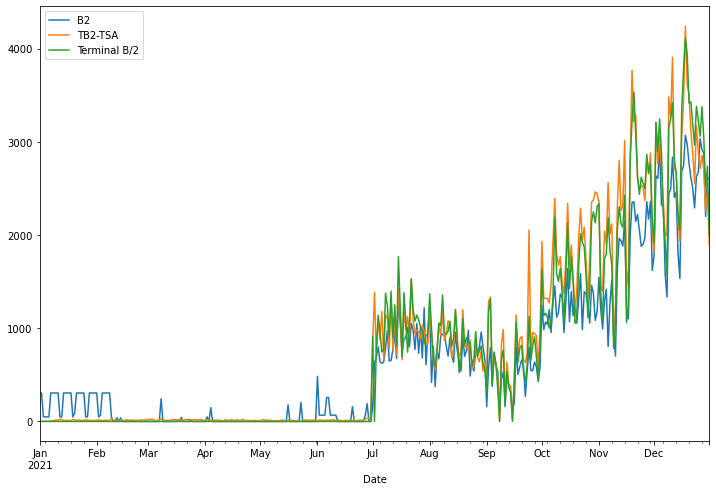

In [3090]:
pax_dly[['B2','TB2-TSA','Terminal B/2']].plot()

<AxesSubplot:xlabel='Date'>

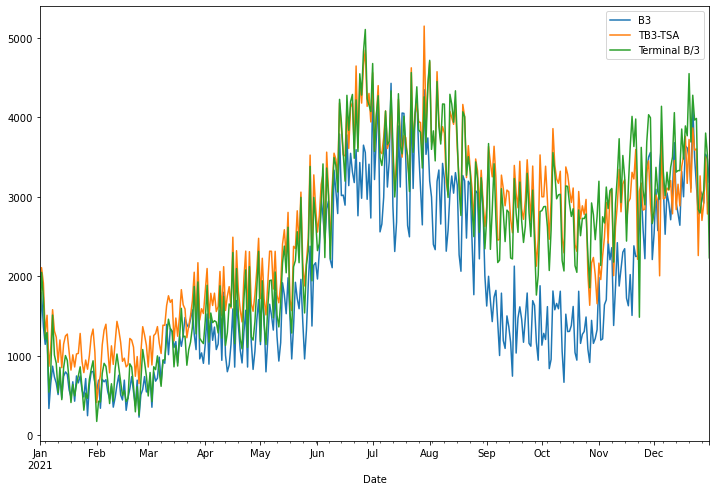

In [3091]:
pax_dly[['B3','TB3-TSA','Terminal B/3']].plot()

<AxesSubplot:>

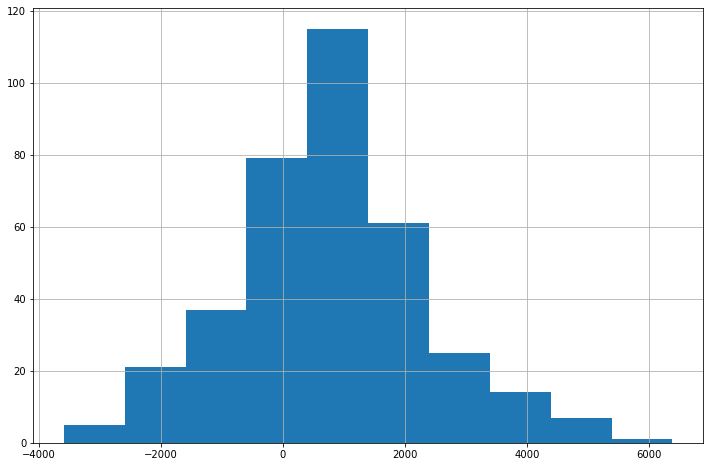

In [3092]:
#distribution of the differences between daily bliptrack and fs counts.
(pax_dly['blip_total'] - pax_dly['fs_total']).hist()

<AxesSubplot:>

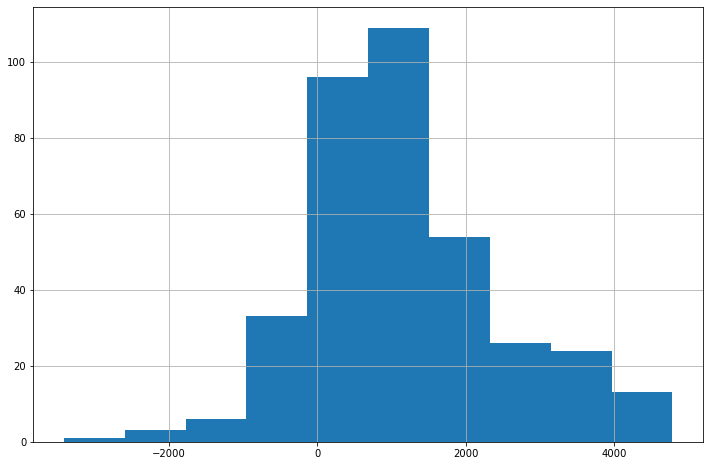

In [3093]:
#distribution of the differences between daily tsa and fs counts.
(pax_dly['tsa_total'] - pax_dly['fs_total']).hist()

<AxesSubplot:>

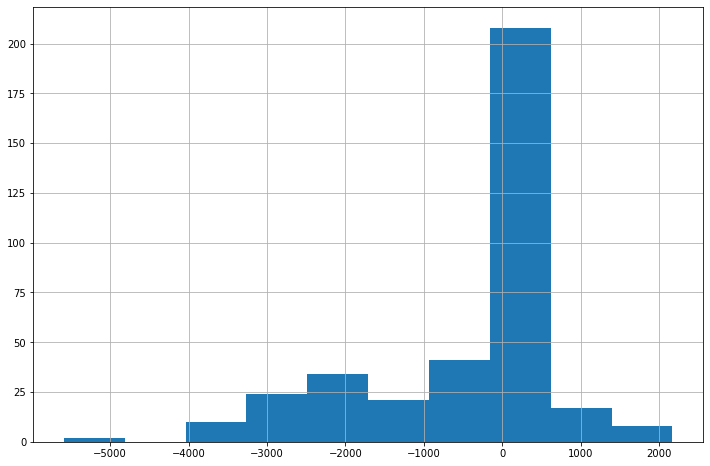

In [3094]:
#distribution of the differences between daily bliptrack and tsa counts.
(pax_dly['blip_total'] - pax_dly['tsa_total']).hist()

General conclusion- the TSA and BlipTrack data are pretty consistent with one another, but I think the TSA data looks more realistic for a couple reasons: 1) In B1, the BlipTrack data drops pretty significantly in April 2021, which is right when people are getting vaccinated; 2) there are HUGE swings in the BlipTrack daily data in Concourse B1 in September-December 2021, in some cases dropping to nearly zero passengers per day, which seems unrealistic.

As for the FS data, it is definitely under-counting but follows the trend of TSA and Bliptrack data pretty well.

For the purposes of training a model, we want to make sure that the flight-level estimates are in alignment with the TSA data, so we will calculate a daily ratio of TSA passengers by concourse : FS passengers by concourse, and multiply the flight-level passenger counts by that ratio for each given day.

In [3095]:
pax_dly['B1_factor'] = pax_dly['Terminal B/1'] / pax_dly['B1']
pax_dly['B2_factor'] = pax_dly['Terminal B/2'] / pax_dly['B2']
pax_dly['B3_factor'] = pax_dly['Terminal B/3'] / pax_dly['B3']

In [3096]:
pax_dly['date'] = pax_dly.index.copy().date

In [3097]:
#merge the factors back into the flight schedule data based on date and concourse
mg = pd.merge(mg, pax_dly[['date','B1_factor','B2_factor','B3_factor']], how='left',left_on ='date', right_on='date')

In [3099]:
#calculate adjusted passengers per flight and load factor
mg['PAX_adj'] = 0

for i in mg.index:
    if mg.loc[i,'Departure Concourse'] == 'B1':
        mg.loc[i,'PAX_adj'] = mg.loc[i,'PAX'] * mg.loc[i,'B1_factor']
    elif mg.loc[i,'Departure Concourse'] == 'B2':
        mg.loc[i,'PAX_adj'] = mg.loc[i,'PAX'] * mg.loc[i,'B2_factor']
    else:
        mg.loc[i,'PAX_adj'] = mg.loc[i,'PAX'] * mg.loc[i,'B3_factor']

mg['LF_adj'] = mg['PAX_adj'] / mg['SeatsxFl']

In [3100]:
# this does result in about 30% of flights having load factors above 1, but there is no way to avoid it given the number of seats and the total passenger counts
mg['LF_adj'].describe()

count    19830.000000
mean         0.897911
std          0.554710
min          0.000000
25%          0.662683
50%          0.876693
75%          1.047334
max         17.981669
Name: LF_adj, dtype: float64

In [3102]:
# Indeed, the total number of passengers per the flight schedule now matches the total TSA passengers!
mg['PAX_adj'].sum()

2984885.0

In [3103]:
tsa['Act Pax Hourly'].sum()

2984885

In [3104]:
adjpax_dly_fs = mg[['date', 'Departure Concourse','PAX_adj']].pivot_table(values = 'PAX_adj',index='date',columns='Departure Concourse',aggfunc='sum',fill_value=0)
adjpax_dly_fs['fs_total'] = adjpax_dly_fs.B1 + adjpax_dly_fs.B2 + adjpax_dly_fs.B3

<AxesSubplot:xlabel='Date'>

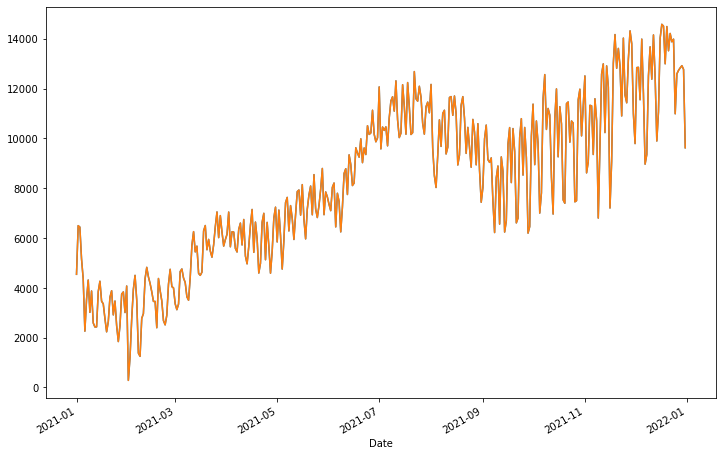

In [3105]:
# Also matches by date and concourse.
adjpax_dly_fs['fs_total'].plot()
pax_dly_tsa['tsa_total'].plot()

## Add Business/leisure pax ratios

In [3430]:
pax_survey=pd.read_csv(r'C:\Users\Gabriel\OneDrive\CUSP\Spring 2022 Classes\Capstone\Data\ewr_pax_survey.csv',skipfooter=3)
pax_survey.head()

,Year-Quarter,Traffic Type Desc,Reason Code,Survey Count
0,2017Q4,Domestic,Business,15
1,2017Q4,Domestic,Leisure,17
2,2017Q4,Domestic,Other,8
3,2017Q4,International,Business,11
4,2017Q4,International,Leisure,32


In [3431]:
pax_survey = pax_survey.pivot(index=['Year-Quarter','Traffic Type Desc'],columns = 'Reason Code').reset_index()
pax_survey = pax_survey.droplevel(level=0, axis=1)
pax_survey.columns = ['Year-Quarter', 'InternationalDomestic', 'Business', 'Leisure', 'Other']
pax_survey.head()

,Year-Quarter,InternationalDomestic,Business,Leisure,Other
0,2017Q4,Domestic,15,17,8
1,2017Q4,International,11,32,10
2,2018Q1,Domestic,9,28,5
3,2018Q1,International,18,53,8
4,2018Q2,Domestic,7,29,12


In [3432]:
#Create ratio of business pax to total pax
pax_survey['bus_percent'] = pax_survey['Business'] / (pax_survey['Business'] + pax_survey['Leisure'] + pax_survey['Other'])

In [3440]:
pax_survey.head()

,Year-Quarter,InternationalDomestic,Business,Leisure,Other,bus_percent
0,2017Q4,Domestic,15,17,8,0.375000
1,2017Q4,International,11,32,10,0.207547
2,2018Q1,Domestic,9,28,5,0.214286
3,2018Q1,International,18,53,8,0.227848
4,2018Q2,Domestic,7,29,12,0.145833


In [3435]:
# create a new column in the merged data for quarter
mg['quarter'] = mg.DT_sched.dt.to_period('Q').astype(str)

In [3438]:
mg.head(2)

,Id,Aircraft Id,Aircraft Code,Airline Id,ICAO Airline,Arr Airport Code,Dep Terminal,Flight No,International Domestic,Flight Distance,Flight Duration,Operating Airline Code,Operating Airline Name,Operating Airline Id,Flight Time,Departure Concourse,Date,date,Time,DT_sched,Hour,Seats,month,year,Time Category,DOW,DOW_l,holiday,BTS Aircraft Type Desc_1,BTS Aircraft Type Desc_2,BTS Aircraft Type Code,ICAO Aircraft Code,IATA Aircraft Code,ADG,iata_code,Region,airline_iata,airline_icao,airline_type,total_doses,CARRIER,DEST,YEAR,MONTH,DEPARTURES_PERFORMED,SEATS,PASSENGERS,DISTANCE,CARRIER_NAME,DEST_CITY_NAME,DEST_COUNTRY_NAME,seatsxfl_x,paxxfl_mavg_x,lf_mavg_x,_merge,gid,sid,seatsxfl_avg,paxxfl_mavg_avg,lf_mavg_avg,SeatsxFl,PaxxFl,lf,PAX,B1_factor,B2_factor,B3_factor,PAX_adj,LF_adj,quarter
0,98394474,6465,77L,404,AIC,DEL,B,106,International,7323,820,AI,Air India,404,1900-01-01T11:15:00.000Z,B3,2021-01-02,2021-01-02,11:15,2021-01-02 11:15:00,11,238,1,2021,Morning,5,Saturday,1,BOEING 777-200/200LR,Boeing 777-200ER/200LR/233LR,627,B772,77L,V,DEL,Asia,AI,AIC,TR,4745800,AI,DEL,2021.0,1.0,37.0,11718.0,7258.0,7324.0,National Aviation Company of India Limited d/b...,"Delhi, India",India,316.702703,196.162162,0.619389,both,20211AsiaTRV,20211DELAIV,316.702703,196.162162,0.619389,316.702703,196.162162,0.619389,147.414576,1.213643,0.0,1.141888,168.330972,0.531511,2021Q1
1,98394899,6395,321,6110,DJT,ORY,B,101,International,3648,440,B0,La Compagnie,6110,1900-01-01T19:30:00.000Z,B2,2021-01-01,2021-01-01,19:30,2021-01-01 19:30:00,19,76,1,2021,Evening,4,Friday,1,AIRBUS INDUSTRIE A321,Airbus Industrie A321-200n,721,A321,321,III,ORY,Europe,B0,DJT,TR,4438527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,20211EuropeTRIII,20211ORYB0III,NaN,NaN,NaN,114.149606,77.970281,0.643289,48.889948,1.104367,0.0,1.044022,0.000000,0.000000,2021Q1


In [3441]:
mg = pd.merge(mg, pax_survey[['Year-Quarter','InternationalDomestic','bus_percent']],how='left',left_on=['quarter','International Domestic'], right_on = ['Year-Quarter','InternationalDomestic'])

In [3443]:
mg['PAX_bus'] = mg['PAX_adj'] * mg['bus_percent']
mg['PAX_lei'] = mg['PAX_adj'] - mg['PAX_bus']

<AxesSubplot:>

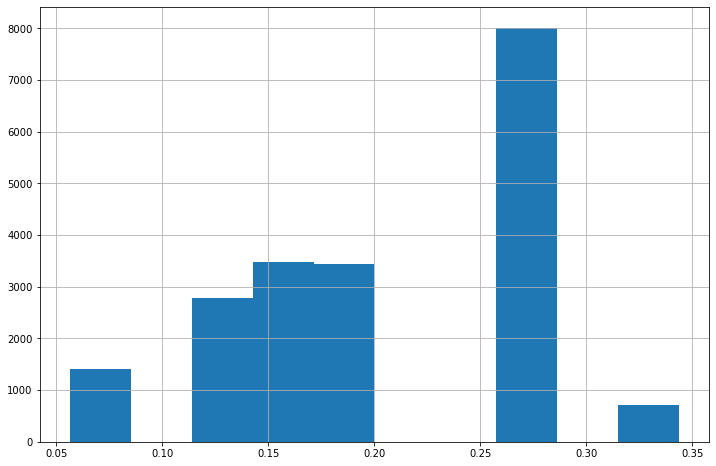

In [3446]:
mg.bus_percent.hist()

## Clean up the mg dataset, leaving only the fields to use for modeling

In [2662]:
mg.head(2)

,Id,Aircraft Id,Aircraft Code,Airline Id,ICAO Airline,Arr Airport Code,Dep Terminal,Flight No,International Domestic,Flight Distance,Flight Duration,Operating Airline Code,Operating Airline Name,Operating Airline Id,Flight Time,Departure Concourse,Date,date,Time,DT_sched,Hour,month,year,Time Category,DOW,DOW_l,holiday,BTS Aircraft Type Desc_1,BTS Aircraft Type Desc_2,BTS Aircraft Type Code,ICAO Aircraft Code,IATA Aircraft Code,ADG,iata_code,Region,airline_iata,airline_icao,airline_type,total_doses,CARRIER,DEST,YEAR,MONTH,DEPARTURES_PERFORMED,SEATS,PASSENGERS,DISTANCE,CARRIER_NAME,DEST_CITY_NAME,DEST_COUNTRY_NAME,seatsxfl_x,paxxfl_mavg_x,lf_mavg_x,_merge,gid,sid,seatsxfl_avg,paxxfl_mavg_avg,lf_mavg_avg,SeatsxFl,PaxxFl,LF,B1_factor,B2_factor,B3_factor,PaxxFl_adj,LF_adj
0,98394474,6465,77L,404,AIC,DEL,B,106,International,7323,820,AI,Air India,404,1900-01-01T11:15:00.000Z,B3,2021-01-02,2021-01-02,11:15,2021-01-02 11:15:00,11,1,2021,Morning,5,Saturday,1,BOEING 777-200/200LR,Boeing 777-200ER/200LR/233LR,627,B772,77L,V,DEL,Asia,AI,AIC,TR,4745800,AI,DEL,2021.0,1.0,37.0,11718.0,7258.0,7324.0,National Aviation Company of India Limited d/b...,"Delhi, India",India,316.702703,196.162162,0.619389,both,20211AsiaTRV,20211DELAIV,316.702703,196.162162,0.619389,316.702703,196.162162,0.619389,1.259443,0.0,1.155356,226.637106,0.715615
1,98394899,6395,321,6110,DJT,ORY,B,101,International,3648,440,B0,La Compagnie,6110,1900-01-01T19:30:00.000Z,B2,2021-01-01,2021-01-01,19:30,2021-01-01 19:30:00,19,1,2021,Evening,4,Friday,1,AIRBUS INDUSTRIE A321,Airbus Industrie A321-200n,721,A321,321,III,ORY,Europe,B0,DJT,TR,4438527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,20211EuropeTRIII,20211ORYB0III,NaN,NaN,NaN,114.149606,77.970281,0.643289,1.146068,0.0,1.028313,0.000000,0.000000


In [3467]:
df = mg[[
       'DT_sched','Flight No','iata_code', 
       'Region','International Domestic', 'Flight Distance', 'Flight Duration',
       'Operating Airline Name','airline_iata', 'airline_icao', 'airline_type',
        'Departure Concourse',
       'date', 'Time', 'Hour', 'month', 'year', 'Time Category',
       'DOW', 'DOW_l', 'holiday','total_doses', 'BTS Aircraft Type Desc_1',
       'ICAO Aircraft Code', 'IATA Aircraft Code', 'ADG',
        'Seats', 'LF_adj', 'PAX_adj', 'PAX_bus','PAX_lei']]

In [3447]:
df.head(2)

,DT_sched,Flight No,iata_code,Region,International Domestic,Flight Distance,Flight Duration,Operating Airline Name,airline_iata,airline_icao,airline_type,Departure Concourse,date,Time,Hour,month,year,Time Category,DOW,DOW_l,holiday,total_doses,BTS Aircraft Type Desc_1,ICAO Aircraft Code,IATA Aircraft Code,ADG,Seats,LF_adj,PAX_adj,PAX_bus,PAX_lei
0,2021-01-02 11:15:00,106,DEL,Asia,International,7323,820,Air India,AI,AIC,TR,B3,2021-01-02,11:15,11,1,2021,Morning,5,Saturday,1,4745800,BOEING 777-200/200LR,B772,77L,V,238,0.531511,168.330972,57.863772,110.467201
1,2021-01-01 19:30:00,101,ORY,Europe,International,3648,440,La Compagnie,B0,DJT,TR,B2,2021-01-01,19:30,19,1,2021,Evening,4,Friday,1,4438527,AIRBUS INDUSTRIE A321,A321,321,III,76,0.000000,0.000000,0.000000,0.000000


In [3518]:
df.ADG.value_counts()

AttributeError: 'DataFrame' object has no attribute 'ADG'

In [3468]:
# One hot encoding for categorical variables: Region, airline_type, Time Category, DOW, ADG
df['airline_type_dum'] = df['airline_type'].replace({'TR':0,'LC':1})
df['domintl_dum'] = df['International Domestic'].replace({'Domestic':0,'International':1})
df['region'] = df['Region'].copy()
df = pd.get_dummies(df,columns = ['Region','domintl_dum','Time Category','DOW','ADG'])
df['Month'] = df['month'].copy()
df = pd.get_dummies(df,columns = ['airline_iata','month','Hour']) # let's also do it for some of the more specific categorical variables
df.head(2)

,DT_sched,Flight No,iata_code,International Domestic,Flight Distance,Flight Duration,Operating Airline Name,airline_icao,airline_type,Departure Concourse,date,Time,year,DOW_l,holiday,total_doses,BTS Aircraft Type Desc_1,ICAO Aircraft Code,IATA Aircraft Code,Seats,LF_adj,PAX_adj,PAX_bus,PAX_lei,airline_type_dum,region,Region_Africa,Region_Asia,Region_Canada,Region_Europe,Region_Latin America & Caribbean,Region_USA-Midwest,Region_USA-Northeast,Region_USA-Pacific West,Region_USA-Plains,Region_USA-Southeast,domintl_dum_0,domintl_dum_1,Time Category_Afternoon,Time Category_Evening,Time Category_Morning,Time Category_Overnight,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,ADG_II,ADG_III,ADG_IV,ADG_V,ADG_VI,Month,airline_iata_AI,airline_iata_AV,airline_iata_B0,airline_iata_B6,airline_iata_BA,airline_iata_BF,airline_iata_DL,airline_iata_EI,airline_iata_EK,airline_iata_ET,airline_iata_F9,airline_iata_FI,airline_iata_G4,airline_iata_LH,airline_iata_LO,airline_iata_LX,airline_iata_LY,airline_iata_NK,airline_iata_OS,airline_iata_PD,airline_iata_SK,airline_iata_SY,airline_iata_TP,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,Hour_0,Hour_1,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,2021-01-02 11:15:00,106,DEL,International,7323,820,Air India,AIC,TR,B3,2021-01-02,11:15,2021,Saturday,1,4745800,BOEING 777-200/200LR,B772,77L,238,0.531511,168.330972,57.863772,110.467201,0,Asia,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2021-01-01 19:30:00,101,ORY,International,3648,440,La Compagnie,DJT,TR,B2,2021-01-01,19:30,2021,Friday,1,4438527,AIRBUS INDUSTRIE A321,A321,321,76,0.000000,0.000000,0.000000,0.000000,0,Europe,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [3449]:
train = df[df['Month'] < 10]
val = df[(df['Month'] == 10) | (df['Month'] == 11)]
test = df[df['Month'] == 12]

In [3319]:
#Standard scaler for numeric data
from sklearn.preprocessing import StandardScaler

In [3321]:
train.head(2)

,DT_sched,Flight No,iata_code,International Domestic,Flight Distance,Flight Duration,Operating Airline Name,airline_icao,airline_type,Departure Concourse,date,Time,year,DOW_l,holiday,total_doses,BTS Aircraft Type Desc_1,ICAO Aircraft Code,IATA Aircraft Code,Seats,PAX_adj,LF_adj,airline_type_dum,Region_Africa,Region_Asia,Region_Canada,Region_Europe,Region_Latin America & Caribbean,Region_USA-Midwest,Region_USA-Northeast,Region_USA-Pacific West,Region_USA-Plains,Region_USA-Southeast,domintl_dum_0,domintl_dum_1,Time Category_Afternoon,Time Category_Evening,Time Category_Morning,Time Category_Overnight,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,ADG_II,ADG_III,ADG_IV,ADG_V,ADG_VI,Month,airline_iata_AI,airline_iata_AV,airline_iata_B0,airline_iata_B6,airline_iata_BA,airline_iata_BF,airline_iata_DL,airline_iata_EI,airline_iata_EK,airline_iata_ET,airline_iata_F9,airline_iata_FI,airline_iata_G4,airline_iata_LH,airline_iata_LO,airline_iata_LX,airline_iata_LY,airline_iata_NK,airline_iata_OS,airline_iata_PD,airline_iata_SK,airline_iata_SY,airline_iata_TP,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,Hour_0,Hour_1,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,2021-01-02 11:15:00,106,DEL,International,7323,820,Air India,AIC,TR,B3,2021-01-02,11:15,2021,Saturday,1,4745800,BOEING 777-200/200LR,B772,77L,238,168.330972,0.531511,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2021-01-01 19:30:00,101,ORY,International,3648,440,La Compagnie,DJT,TR,B2,2021-01-01,19:30,2021,Friday,1,4438527,AIRBUS INDUSTRIE A321,A321,321,76,0.000000,0.000000,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [3522]:
#fit the StandardScaler on the training data, transform all data
ss = StandardScaler()
ss.fit(train[['Flight Distance','total_doses']])
train[['distance_sc','total_doses_sc']] = ss.transform(train[['Flight Distance','total_doses']])
val[['distance_sc','total_doses_sc']] = ss.transform(val[['Flight Distance','total_doses']])
test[['distance_sc','total_doses_sc']] = ss.transform(test[['Flight Distance','total_doses']])

In [3330]:
X_train=train[['airline_type_dum',
       'Region_Africa', 'Region_Asia', 'Region_Canada', 'Region_Europe',
       'Region_Latin America & Caribbean', 'Region_USA-Midwest',
       'Region_USA-Northeast', 'Region_USA-Pacific West', 'Region_USA-Plains',
       'Region_USA-Southeast', 'Time Category_Afternoon',
       'Time Category_Evening', 'Time Category_Morning',
       'Time Category_Overnight', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4',
       'DOW_5', 'DOW_6', 'distance_sc', 
       'holiday','total_doses_sc']]
y_train=train['PAX_adj']

In [3331]:
X_val=val[['airline_type_dum',
       'Region_Africa', 'Region_Asia', 'Region_Canada', 'Region_Europe',
       'Region_Latin America & Caribbean', 'Region_USA-Midwest',
       'Region_USA-Northeast', 'Region_USA-Pacific West', 'Region_USA-Plains',
       'Region_USA-Southeast', 'Time Category_Afternoon',
       'Time Category_Evening', 'Time Category_Morning',
       'Time Category_Overnight', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4',
       'DOW_5', 'DOW_6', 'distance_sc', 
       'holiday','total_doses_sc']]
y_val=val['PAX_adj']

In [3333]:
X_test=test[['airline_type_dum',
       'Region_Africa', 'Region_Asia', 'Region_Canada', 'Region_Europe',
       'Region_Latin America & Caribbean', 'Region_USA-Midwest',
       'Region_USA-Northeast', 'Region_USA-Pacific West', 'Region_USA-Plains',
       'Region_USA-Southeast', 'Time Category_Afternoon',
       'Time Category_Evening', 'Time Category_Morning',
       'Time Category_Overnight', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4',
       'DOW_5', 'DOW_6', 'distance_sc', 
       'holiday','total_doses_sc']]
y_test=test['PAX_adj']

In [3334]:
# These are training datasets with expanded variable categories (e.g. 24 hours vs. 4 time categories)
X_train_exp=train.drop(['DT_sched', 'Flight No', 'iata_code', 'International Domestic','Flight Duration', 'Operating Airline Name',
       'airline_icao', 'airline_type', 'Departure Concourse','year', 'DOW_l', 'BTS Aircraft Type Desc_1', 'ICAO Aircraft Code',
       'IATA Aircraft Code', 'Seats', 'PAX_adj', 'LF_adj', 'date', 'Month','Time', 'total_doses','Flight Distance'],axis=1)

X_val_exp=val.drop(['DT_sched', 'Flight No', 'iata_code', 'International Domestic','Flight Duration', 'Operating Airline Name',
       'airline_icao', 'airline_type', 'Departure Concourse','year', 'DOW_l', 'BTS Aircraft Type Desc_1', 'ICAO Aircraft Code',
       'IATA Aircraft Code', 'Seats', 'PAX_adj', 'LF_adj', 'date', 'Month','Time', 'total_doses','Flight Distance'],axis=1)

X_test_exp=test.drop(['DT_sched', 'Flight No', 'iata_code', 'International Domestic','Flight Duration', 'Operating Airline Name',
       'airline_icao', 'airline_type', 'Departure Concourse','year', 'DOW_l', 'BTS Aircraft Type Desc_1', 'ICAO Aircraft Code',
       'IATA Aircraft Code', 'Seats', 'PAX_adj', 'LF_adj', 'date', 'Month','Time', 'total_doses','Flight Distance'],axis=1)

In [ ]:
# Can I do a random train-test split instead of by month?
# Can I use cross-validation with random folds for the flight schedule and combine my train+test data?
# The flight schedule isn't exactly time series data, but it is true that flights in October are more likely to be similar to each other than flights in March, for example.

In [ ]:
# Group the dataset by 10-minute increments and make a true time series. This can be shared with Yuki and used for my own modeling.
# Group the passenger counts by business/leisure, international/domestic, traditional/budget.
# Also include the count of flights / total number of seats for each 10-minute interval, by concourse, destination region, and airline type
# Include the time-based variables too - holiday, time of day, day of week, vaccine count
# Create lags in 30-minute increments

## Transform into time-series dataset

In [3681]:
#Create a dataframe with 10-minute interval index for 2021
ts = pd.DataFrame(data = 0,index=pd.date_range(start='1/1/2021',end='2021-12-31 23:50:00',freq='10Min'),columns = ['date'])
ts['date'] = list(pd.Series(ts.index).dt.date)
ts['dow'] = list(pd.Series(ts.index).dt.weekday)
ts['hour'] = list(pd.Series(ts.index).dt.hour)
ts.head()

,date,dow,hour
2021-01-01 00:00:00,2021-01-01,4,0
2021-01-01 00:10:00,2021-01-01,4,0
2021-01-01 00:20:00,2021-01-01,4,0
2021-01-01 00:30:00,2021-01-01,4,0
2021-01-01 00:40:00,2021-01-01,4,0


In [3682]:
# merge covid vaccine numbers
ts = pd.merge(ts, vax[['date','total_doses']], how= 'left', left_on = 'date', right_on = 'date').set_axis(ts.index)

In [3685]:
#if the departure date is in the list of holidays, mark as a 1 or if the departure date is in the list of days surrounding holidays, also mark as a 1
ts['holiday'] = 0
for i in ts.index:
    if ts.loc[i,'date'] in hds:
        ts.loc[i,'holiday'] = 1
    elif ts.loc[i,'date'] in fl_hds:
        ts.loc[i,'holiday'] = 1

In [3686]:
# time categories
lsthour = []
for s in ts['hour']:
        if s in morning:
            lsthour.append('Morning')
        elif s in afternoon:
            lsthour.append('Afternoon')
        elif s in evening:
            lsthour.append('Evening')
        elif s in overnight:
            lsthour.append('Overnight')

ts['tod'] = lsthour

In [3687]:
#encode categorical variables
ts.drop('hour',axis=1,inplace=True)
ts = pd.get_dummies(ts,columns=['dow','tod'])
ts.head()

,date,total_doses,holiday,dow_0,dow_1,dow_2,dow_3,dow_4,dow_5,dow_6,tod_Afternoon,tod_Evening,tod_Morning,tod_Overnight
2021-01-01 00:00:00,2021-01-01,4438527,1,0,0,0,0,1,0,0,0,0,0,1
2021-01-01 00:10:00,2021-01-01,4438527,1,0,0,0,0,1,0,0,0,0,0,1
2021-01-01 00:20:00,2021-01-01,4438527,1,0,0,0,0,1,0,0,0,0,0,1
2021-01-01 00:30:00,2021-01-01,4438527,1,0,0,0,0,1,0,0,0,0,0,1
2021-01-01 00:40:00,2021-01-01,4438527,1,0,0,0,0,1,0,0,0,0,0,1


In [3688]:
#group the flight schedule into 10-minute intervals
df2 = df[['DT_sched','Flight No', 'International Domestic','region','airline_type', 'Departure Concourse','Seats','PAX_adj','PAX_bus','PAX_lei']].groupby([
    pd.Grouper(key='DT_sched', freq='10Min'),'International Domestic','region','airline_type','Departure Concourse']).agg({
    'Flight No':'count','Seats':'sum','PAX_adj':'sum','PAX_bus':'sum','PAX_lei':'sum'}).reset_index()
df2.head()

,DT_sched,International Domestic,region,airline_type,Departure Concourse,Flight No,Seats,PAX_adj,PAX_bus,PAX_lei
0,2021-01-01 00:50:00,Domestic,Latin America & Caribbean,LC,B3,1,228,213.448633,32.610208,180.838425
1,2021-01-01 06:00:00,Domestic,USA-Midwest,TR,B1,1,109,57.806095,8.831487,48.974608
2,2021-01-01 06:00:00,Domestic,USA-Southeast,LC,B1,1,228,149.302328,22.810078,126.492250
3,2021-01-01 06:10:00,Domestic,USA-Southeast,TR,B1,2,320,203.533408,31.095382,172.438027
4,2021-01-01 07:00:00,Domestic,USA-Southeast,LC,B1,2,364,198.203545,30.281097,167.922448


In [3689]:
# re-pivot so that all values are continuous variables
df2p = df2.pivot_table(index='DT_sched',columns = ['International Domestic','region','airline_type','Departure Concourse'],dropna=False,aggfunc='sum').fillna(0)
df2p.head()

Flight No                                               \
International Domestic  Domestic                                                
region                    Africa                          Asia                  
airline_type                  LC             TR             LC             TR   
Departure Concourse           B1   B2   B3   B1   B2   B3   B1   B2   B3   B1   
DT_sched                                                                        
2021-01-01 00:50:00          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2021-01-01 06:00:00          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2021-01-01 06:10:00          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2021-01-01 07:00:00          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2021-01-01 07:30:00          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

                                                                              \
International Domestic                                                         
region                           Canada                          Europe        
airline_type                         LC             TR               LC        
Departure Concourse      B2   B3     B1   B2   B3   B1   B2   B3     B1   B2   
DT_sched                                                                       
2021-01-01 00:50:00     0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0   
2021-01-01 06:00:00     0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0   
2021-01-01 06:10:00     0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0   
2021-01-01 07:00:00     0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0   
2021-01-01 07:30:00     0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0   

                                                                           \
International Domestic                                                      
region                                     Latin America & Caribbean        
airline_type                  TR                                  LC        
Departure Concourse      B3   B1   B2   B3                        B1   B2   
DT_sched                                                                    
2021-01-01 00:50:00     0.0  0.0  0.0  0.0                       0.0  0.0   
2021-01-01 06:00:00     0.0  0.0  0.0  0.0                       0.0  0.0   
2021-01-01 06:10:00     0.0  0.0  0.0  0.0                       0.0  0.0   
2021-01-01 07:00:00     0.0  0.0  0.0  0.0                       0.0  0.0   
2021-01-01 07:30:00     0.0  0.0  0.0  0.0                       0.0  0.0   

                                                                            \
International Domestic                                                       
region                                     USA-Midwest                       
airline_type                  TR                    LC             TR        
Departure Concourse      B3   B1   B2   B3          B1   B2   B3   B1   B2   
DT_sched                                                                     
2021-01-01 00:50:00     1.0  0.0  0.0  0.0         0.0  0.0  0.0  0.0  0.0   
2021-01-01 06:00:00     0.0  0.0  0.0  0.0         0.0  0.0  0.0  1.0  0.0   
2021-01-01 06:10:00     0.0  0.0  0.0  0.0         0.0  0.0  0.0  0.0  0.0   
2021-01-01 07:00:00     0.0  0.0  0.0  0.0         0.0  0.0  0.0  0.0  0.0   
2021-01-01 07:30:00     0.0  0.0  0.0  0.0         0.0  0.0  0.0  1.0  0.0   

                                                                    \
International Domestic                                               
region                      USA-Northeast                            
airline_type                           LC             TR             
Departure Concourse      B3            B1   B2   B3   B1   B2   B3   
DT_sched                                                             
2021-01-01 00:50:00     0.0           0.0  0.0  0.0  0.0  0.0  0.0   
2021-01-01 06:00:00     0.0           0.0  0.0  0.0  

In [3690]:
#Group some columns into more useful features for modeling

df2p['seats_tr'] = df2p.loc(axis=1)['Seats',:,:,'TR'].sum(axis=1)
df2p['seats_lc'] = df2p.loc(axis=1)['Seats',:,:,'LC'].sum(axis=1)

df2p['seats_lc_afr'] = df2p.loc(axis=1)['Seats',:,'Africa','LC'].sum(axis=1)
df2p['seats_lc_asi'] = df2p.loc(axis=1)['Seats',:,'Asia','LC'].sum(axis=1)
df2p['seats_lc_can'] = df2p.loc(axis=1)['Seats',:,'Canada','LC'].sum(axis=1)
df2p['seats_lc_eur'] = df2p.loc(axis=1)['Seats',:,'Europe','LC'].sum(axis=1)
df2p['seats_lc_lac'] = df2p.loc(axis=1)['Seats',:,'Latin America & Caribbean','LC'].sum(axis=1)
df2p['seats_lc_midwest'] = df2p.loc(axis=1)['Seats',:,'USA-Midwest','LC'].sum(axis=1)
df2p['seats_lc_northeast'] = df2p.loc(axis=1)['Seats',:,'USA-Northeast','LC'].sum(axis=1)
df2p['seats_lc_west'] = df2p.loc(axis=1)['Seats',:,'USA-Pacific West','LC'].sum(axis=1)
df2p['seats_lc_plains'] = df2p.loc(axis=1)['Seats',:,'USA-Plains','LC'].sum(axis=1)
df2p['seats_lc_southeast'] = df2p.loc(axis=1)['Seats',:,'USA-Southeast','LC'].sum(axis=1)

df2p['seats_tr_afr'] = df2p.loc(axis=1)['Seats',:,'Africa','TR'].sum(axis=1)
df2p['seats_tr_asi'] = df2p.loc(axis=1)['Seats',:,'Asia','TR'].sum(axis=1)
df2p['seats_tr_can'] = df2p.loc(axis=1)['Seats',:,'Canada','TR'].sum(axis=1)
df2p['seats_tr_eur'] = df2p.loc(axis=1)['Seats',:,'Europe','TR'].sum(axis=1)
df2p['seats_tr_lac'] = df2p.loc(axis=1)['Seats',:,'Latin America & Caribbean','TR'].sum(axis=1)
df2p['seats_tr_midwest'] = df2p.loc(axis=1)['Seats',:,'USA-Midwest','TR'].sum(axis=1)
df2p['seats_tr_northeast'] = df2p.loc(axis=1)['Seats',:,'USA-Northeast','TR'].sum(axis=1)
df2p['seats_tr_west'] = df2p.loc(axis=1)['Seats',:,'USA-Pacific West','TR'].sum(axis=1)
df2p['seats_tr_plains'] = df2p.loc(axis=1)['Seats',:,'USA-Plains','TR'].sum(axis=1)
df2p['seats_tr_southeast'] = df2p.loc(axis=1)['Seats',:,'USA-Southeast','TR'].sum(axis=1)



df2p['pax_intl_bus'] = df2p.loc(axis=1)['PAX_bus','International'].sum(axis=1)
df2p['pax_intl_lei'] = df2p.loc(axis=1)['PAX_lei','International'].sum(axis=1)
df2p['pax_dom_bus'] = df2p.loc(axis=1)['PAX_bus','Domestic'].sum(axis=1)
df2p['pax_dom_lei'] = df2p.loc(axis=1)['PAX_lei','Domestic'].sum(axis=1)

df2p['pax_B1_dom'] = df2p.loc(axis=1)['PAX_adj','Domestic',:,:,'B1'].sum(axis=1)
df2p['pax_B2_dom'] = df2p.loc(axis=1)['PAX_adj','Domestic',:,:,'B2'].sum(axis=1)
df2p['pax_B3_dom'] = df2p.loc(axis=1)['PAX_adj','Domestic',:,:,'B3'].sum(axis=1)
df2p['pax_B1_intl'] = df2p.loc(axis=1)['PAX_adj','International',:,:,'B1'].sum(axis=1)
df2p['pax_B2_intl'] = df2p.loc(axis=1)['PAX_adj','International',:,:,'B2'].sum(axis=1)
df2p['pax_B3_intl'] = df2p.loc(axis=1)['PAX_adj','International',:,:,'B3'].sum(axis=1)

In [3691]:
# keep just the relevant features that were just created
df2p2 = df2p.iloc[:,-32:]
df2p2.columns = list(df2p.iloc[:,-32:].columns.droplevel(-1).droplevel(-1).droplevel(-1).droplevel(-1))
df2p2.head()

,seats_tr,seats_lc,seats_lc_afr,seats_lc_asi,seats_lc_can,seats_lc_eur,seats_lc_lac,seats_lc_midwest,seats_lc_northeast,seats_lc_west,seats_lc_plains,seats_lc_southeast,seats_tr_afr,seats_tr_asi,seats_tr_can,seats_tr_eur,seats_tr_lac,seats_tr_midwest,seats_tr_northeast,seats_tr_west,seats_tr_plains,seats_tr_southeast,pax_intl_bus,pax_intl_lei,pax_dom_bus,pax_dom_lei,pax_B1_dom,pax_B2_dom,pax_B3_dom,pax_B1_intl,pax_B2_intl,pax_B3_intl
DT_sched,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:50:00,0.0,228.0,0.0,0.0,0.0,0.0,228.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.610208,180.838425,0.000000,0.0,213.448633,0.0,0.0,0.0
2021-01-01 06:00:00,109.0,228.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,228.0,0.0,0.0,0.0,0.0,0.0,109.0,0.0,0.0,0.0,0.0,0.0,0.0,31.641565,175.466858,207.108422,0.0,0.000000,0.0,0.0,0.0
2021-01-01 06:10:00,320.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,320.0,0.0,0.0,31.095382,172.438027,203.533408,0.0,0.000000,0.0,0.0,0.0
2021-01-01 07:00:00,0.0,364.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,364.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.281097,167.922448,198.203545,0.0,0.000000,0.0,0.0,0.0
2021-01-01 07:30:00,76.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76.0,0.0,0.0,0.0,0.0,0.0,0.0,6.157734,34.147433,40.305167,0.0,0.000000,0.0,0.0,0.0


In [3702]:
# merge into the ts dataframe
ts = pd.merge(ts,df2p2,how='left',left_index=True,right_index=True).fillna(0)
ts.head()

In [3715]:
# create 30 lag columns (5 hours) for each of the 10 target variables
lags = range(1, 31)  # lagging 30 ten-minute intervals = 5 hours

ts = ts.assign(**{
    f'{col}__t-{lag*10}': ts[col].shift(lag)
    for lag in lags
    for col in ts.iloc[:,-10:]
})

In [3716]:
ts.shape

(52560, 346)

In [3717]:
#export time series for others to use
#ts.to_csv(r'C:\Users\Gabriel\OneDrive\CUSP\Spring 2022 Classes\Capstone\PANYNJ-codebase\pax_ts.csv')

## Regression model

In [ ]:
from sklearn.linear_model import Lasso, Ridge, LinearRegression

In [ ]:
lm = LinearRegression()
lm.fit(X_train, y_train)
print(f'In-sample R2: {lm.score(X_train, y_train)}')
print(f'Validation R2: {lm.score(X_val, y_val)}')


In-sample R2: 0.49671474175080854
Validation R2: 0.3771542119497602


In [ ]:
#WAY overfitted!
lm = LinearRegression()
lm.fit(X_train_exp, y_train)
print(f'In-sample R2: {lm.score(X_train_exp, y_train)}')
print(f'Validation R2: {lm.score(X_val_exp, y_val)}')

In-sample R2: 0.621920548772928
Validation R2: -1.07860799064894e+24


In [ ]:
# Tuning alpha for Lasso Regression with expanded variables. The fact that the optimal alpha is so small indicates that this is still overfitting.
for a in np.logspace(-5,0,20):
    clf = Lasso(alpha=a)
    clf.fit(X_train_exp,y_train)
    print(f"Validation lasso score, alpha value {a}:", clf.score(X_val_exp, y_val))

Validation lasso score, alpha value 1e-05: 0.45344508111814386
Validation lasso score, alpha value 1.8329807108324375e-05: 0.4530861804681354
Validation lasso score, alpha value 3.359818286283781e-05: 0.4524241423467078
Validation lasso score, alpha value 6.158482110660267e-05: 0.45123918943818986
Validation lasso score, alpha value 0.00011288378916846884: 0.44904096850473707
Validation lasso score, alpha value 0.00020691380811147902: 0.44471860142774033
Validation lasso score, alpha value 0.000379269019073225: 0.43765772020956695
Validation lasso score, alpha value 0.0006951927961775605: 0.4234746002963039
Validation lasso score, alpha value 0.0012742749857031334: 0.41240694530092803
Validation lasso score, alpha value 0.002335721469090121: 0.41342419560601285
Validation lasso score, alpha value 0.004281332398719391: 0.4149027786684347
Validation lasso score, alpha value 0.007847599703514606: 0.4197434860071324
Validation lasso score, alpha value 0.01438449888287663: 0.429618051622973

In [ ]:
# Tuning alpha for Lasso Regression with grouped variables. Even with the grouped variables, still looks like overfitting.
for a in np.logspace(-5,0,20):
    clf = Lasso(alpha=a)
    clf.fit(X_train,y_train)
    print(f"Validation lasso score, alpha value {a}:", clf.score(X_val, y_val))

Validation lasso score, alpha value 1e-05: 0.37489073517305505
Validation lasso score, alpha value 1.8329807108324375e-05: 0.374890512837206
Validation lasso score, alpha value 3.359818286283781e-05: 0.37489019665028267
Validation lasso score, alpha value 6.158482110660267e-05: 0.37488952509808704
Validation lasso score, alpha value 0.00011288378916846884: 0.3748882925053336
Validation lasso score, alpha value 0.00020691380811147902: 0.3748860276411029
Validation lasso score, alpha value 0.000379269019073225: 0.37487903128306543
Validation lasso score, alpha value 0.0006951927961775605: 0.37486556171896923
Validation lasso score, alpha value 0.0012742749857031334: 0.3748440283432185
Validation lasso score, alpha value 0.002335721469090121: 0.3750236938639038
Validation lasso score, alpha value 0.004281332398719391: 0.3751022662247304
Validation lasso score, alpha value 0.007847599703514606: 0.375261987028945
Validation lasso score, alpha value 0.01438449888287663: 0.37550567446664107
V

In [ ]:
# Ridge validation on expanded. Not sensitive to tuning, indicates that this isn't as overfitted as the lasso.
for a in np.logspace(-5,1,10):
    clf = Ridge(alpha=1)
    clf.fit(X_train_exp,y_train)
    print(f"Validation Ridge score, alpha value {a}:", clf.score(X_val_exp, y_val))

Validation Ridge score, alpha value 1e-05: 0.42422454669127463
Validation Ridge score, alpha value 4.641588833612782e-05: 0.42422454669127463
Validation Ridge score, alpha value 0.00021544346900318823: 0.42422454669127463
Validation Ridge score, alpha value 0.001: 0.42422454669127463
Validation Ridge score, alpha value 0.004641588833612777: 0.42422454669127463
Validation Ridge score, alpha value 0.021544346900318822: 0.42422454669127463
Validation Ridge score, alpha value 0.1: 0.42422454669127463
Validation Ridge score, alpha value 0.46415888336127725: 0.42422454669127463
Validation Ridge score, alpha value 2.154434690031882: 0.42422454669127463
Validation Ridge score, alpha value 10.0: 0.42422454669127463


In [ ]:
# Ridge validation on grouped. Not sensitive to tuning, indicates that this isn't as overfitted as the lasso.
for a in np.logspace(-5,1,10):
    clf = Ridge(alpha=1)
    clf.fit(X_train,y_train)
    print(f"Validation Ridge score, alpha value {a}:", clf.score(X_val, y_val))

Validation Ridge score, alpha value 1e-05: 0.3749797075698157
Validation Ridge score, alpha value 4.641588833612782e-05: 0.3749797075698157
Validation Ridge score, alpha value 0.00021544346900318823: 0.3749797075698157
Validation Ridge score, alpha value 0.001: 0.3749797075698157
Validation Ridge score, alpha value 0.004641588833612777: 0.3749797075698157
Validation Ridge score, alpha value 0.021544346900318822: 0.3749797075698157
Validation Ridge score, alpha value 0.1: 0.3749797075698157
Validation Ridge score, alpha value 0.46415888336127725: 0.3749797075698157
Validation Ridge score, alpha value 2.154434690031882: 0.3749797075698157
Validation Ridge score, alpha value 10.0: 0.3749797075698157


Of the linear regression models, the Ridge regression with the expanded features performed the best in validation, with r2 = 0.424.

In [ ]:
clf = Ridge(alpha=1)
clf.fit(X_train_exp,y_train)
print(f"Test Ridge score, alpha value 1:", clf.score(X_test_exp, y_test))

Test Ridge score, alpha value 1: 0.0004144851376395309


Unsurprisingly, the test accuracy for this Ridge model is very low, indicating that even regularized regression models can still overfit if we don't do any feature selection/consolidation.

In [ ]:
clf = Ridge(alpha=1)
clf.fit(X_train,y_train)
print(f"Test Ridge score, alpha value 1:", clf.score(X_test, y_test))

Test Ridge score, alpha value 1: 0.22960422836592254


The grouped variable ridge regression is certainly better, but still not great.

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
rf = RandomForestRegressor(max_depth=30, n_estimators = 1000)
rf.fit(X_train_exp,y_train)
print(f"Validation RF score:", rf.score(X_val_exp, y_val))

Validation RF score: 0.5414580668908047


In [ ]:
rf = RandomForestRegressor(max_depth=30, n_estimators = 1000)
rf.fit(X_train,y_train)
print(f"Validation RF score:", rf.score(X_val, y_val))

Validation RF score: 0.6065336859224029


Grouped variables perform better for random forest. Let's tune the max_depth parameter.

In [ ]:
for d in range(5,15):
    rf = RandomForestRegressor(max_depth=d, n_estimators = 100)
    rf.fit(X_train,y_train)
    print(f"Validation RF score, max_depth value {d}:", rf.score(X_val, y_val))

Validation RF score, max_depth value 5: 0.3922608761575995
Validation RF score, max_depth value 6: 0.4138719550767592
Validation RF score, max_depth value 7: 0.46889724992104365
Validation RF score, max_depth value 8: 0.5259269492801495
Validation RF score, max_depth value 9: 0.5815714357553365
Validation RF score, max_depth value 10: 0.6171187519753023
Validation RF score, max_depth value 11: 0.6396359798883976
Validation RF score, max_depth value 12: 0.6428726581378208
Validation RF score, max_depth value 13: 0.6350300335990124
Validation RF score, max_depth value 14: 0.6204783378287999


In [ ]:
#max_depth =12 is the best
rf = RandomForestRegressor(max_depth=12, n_estimators = 1000)
rf.fit(X_train,y_train)
print(f"Test RF score, max_depth value 12:", rf.score(X_test, y_test))

Test RF score, max_depth value 12: 0.409313138948433


In [ ]:
# vaccinations are the most important feature. This is a concern because it indicates that COVID is continuing to have a big impact,
# i.e. that the data is not stable.
fi_rf=pd.DataFrame([list(X_train.columns),list(rf.feature_importances_)]).T
fi_rf.columns = ['variable','feature_importance']
fi_rf = fi_rf.sort_values('feature_importance',ascending=False)
fi_rf

,variable,feature_importance
24,total_doses_sc,0.340219
22,distance_sc,0.237035
0,airline_type_dum,0.156995
6,Region_USA-Midwest,0.156026
14,Time Category_Overnight,0.016853
4,Region_Europe,0.014756
10,Region_USA-Southeast,0.009998
16,DOW_1,0.008059
15,DOW_0,0.007531
13,Time Category_Morning,0.006942


In [ ]:
abc = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=12))
param_grid = {

                'n_estimators':[200,300,400,500],
                'learning_rate':[.001, .005,.01,.03,.1]
                }

clf = GridSearchCV(abc, param_grid=param_grid,verbose=3,n_jobs=-1, cv=2)
clf.fit(X_train,y_train)

print(clf.best_params_)

clf.best_score_


Fitting 2 folds for each of 20 candidates, totalling 40 fits
{'learning_rate': 0.001, 'n_estimators': 300}


0.03801169810040911

In [2270]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib

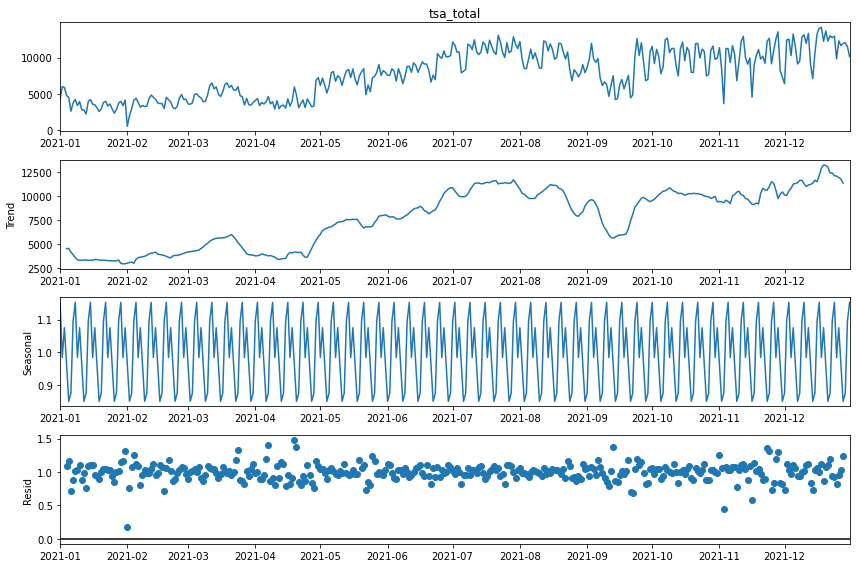

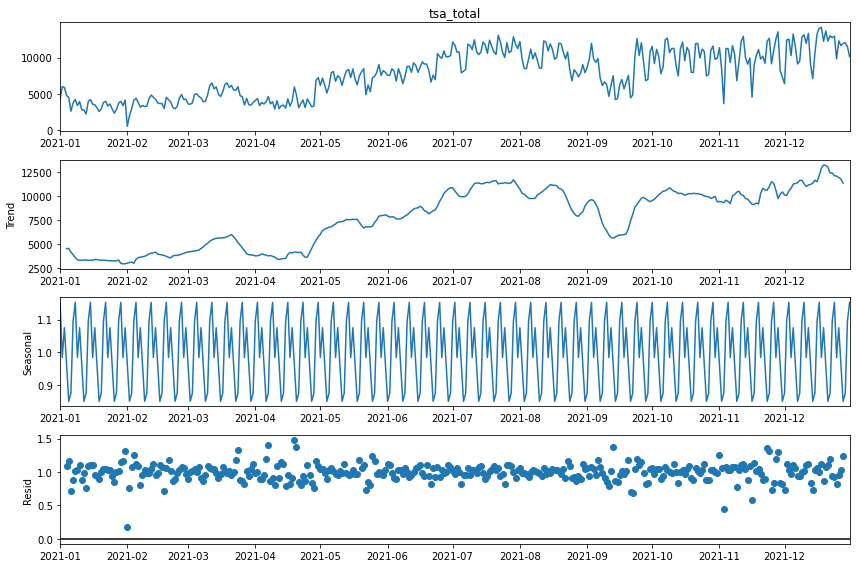

In [2272]:
matplotlib.rcParams['figure.figsize'] = [12, 8]
res = seasonal_decompose(pax_dly['tsa_total'],model='multiplicative')
res.plot()

2456098.9918186613

## Analyzing the merge to inform changes that I will incorporate in the code above.
Note that some of this code will return errors if run after I've incorporated the changes above.

In [966]:
# Look quickly at one example

# In Oct 2021, Frontier reported 13 flights between Newark and Miami (MIA) on aircraft type 722 (A320-200n). According to the flight schedule, there were only 3 such flights.
# In FS, check Frontier flights in Oct 2021 to MIA (regardless of aircraft type)

fs.loc[(fs['Operating Airline Code'] == 'F9') & (fs['iata_code'] == 'MIA') & (fs['month'] == 10),'BTS Aircraft Type Desc_2'].value_counts()

Airbus Industrie A320-100/200    13
Airbus Industrie A320-200n        3
Name: BTS Aircraft Type Desc_2, dtype: int64

In [ ]:
# These aircraft are basically the same, both A320s
# Seems likely that airlines swap out similar aircraft, so maybe using the ADG is better than using the specific aircraft code...

In [971]:
# Indeed, the T100 data shows that Frontier reported a total of 15 flights to Miami (nearly the same as the scheduled 16).
# The aircraft was just swapped - there were actually 13 flights on the A320-200n (vs. 3 in the FS) and only 2 flights on the A320-100/200 (vs. 13 in the FS)
# This would result in a high accuracy for one, and a low accuracy for the other, but if we group by ADG, they will even out and be close to zero.
t1.loc[(t1['CARRIER'] == 'F9') & (t1['DEST'] == 'MIA') & (t1['MONTH'] == 10)]

,DEPARTURES_SCHEDULED,DEPARTURES_PERFORMED,SEATS,PASSENGERS,DISTANCE,UNIQUE_CARRIER,AIRLINE_ID,UNIQUE_CARRIER_NAME,UNIQUE_CARRIER_ENTITY,REGION,CARRIER,CARRIER_NAME,CARRIER_GROUP,CARRIER_GROUP_NEW,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_COUNTRY,DEST_COUNTRY_NAME,DEST_WAC,AIRCRAFT_GROUP,AIRCRAFT_TYPE,AIRCRAFT_CONFIG,YEAR,QUARTER,MONTH,CLASS,DATA_SOURCE,seatsxfl,paxxfl_mavg,lf_mavg
193893,2.0,2.0,360.0,178.0,1085.0,F9,20436,Frontier Airlines Inc.,06460,D,F9,Frontier Airlines Inc.,3,3,11618,EWR,13303,1330303,32467,MIA,"Miami, FL",FL,12.0,Florida,US,United States,33,6,694,1,2021,4,10,F,DU,180.0,89.000000,0.494444
294463,13.0,13.0,2418.0,2036.0,1085.0,F9,20436,Frontier Airlines Inc.,06460,D,F9,Frontier Airlines Inc.,3,3,11618,EWR,13303,1330303,32467,MIA,"Miami, FL",FL,12.0,Florida,US,United States,33,6,722,1,2021,4,10,F,DU,186.0,156.615385,0.842018


In [ ]:
# This supports the idea of grouping by ADG before merging.

In [968]:



# Scheduled Delta EWR-MSP flights in Sept 2021 by aircraft type
fs.loc[(fs['Operating Airline Code'] == 'DL') & (fs['iata_code'] == 'MSP') & (fs['month'] == 10),'BTS Aircraft Type Desc_2'].value_counts()

Airbus Industrie A319            39
Airbus Industrie A320-100/200    20
Airbus Industrie A330-300         1
Name: BTS Aircraft Type Desc_2, dtype: int64

,DEPARTURES_SCHEDULED,DEPARTURES_PERFORMED,SEATS,PASSENGERS,DISTANCE,UNIQUE_CARRIER,AIRLINE_ID,UNIQUE_CARRIER_NAME,UNIQUE_CARRIER_ENTITY,REGION,CARRIER,CARRIER_NAME,CARRIER_GROUP,CARRIER_GROUP_NEW,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_COUNTRY,DEST_COUNTRY_NAME,DEST_WAC,AIRCRAFT_GROUP,AIRCRAFT_TYPE,AIRCRAFT_CONFIG,YEAR,QUARTER,MONTH,CLASS,DATA_SOURCE,seatsxfl,paxxfl_mavg,lf_mavg
193893,2.0,2.0,360.0,178.0,1085.0,F9,20436,Frontier Airlines Inc.,06460,D,F9,Frontier Airlines Inc.,3,3,11618,EWR,13303,1330303,32467,MIA,"Miami, FL",FL,12.0,Florida,US,United States,33,6,694,1,2021,4,10,F,DU,180.0,89.000000,0.494444
294463,13.0,13.0,2418.0,2036.0,1085.0,F9,20436,Frontier Airlines Inc.,06460,D,F9,Frontier Airlines Inc.,3,3,11618,EWR,13303,1330303,32467,MIA,"Miami, FL",FL,12.0,Florida,US,United States,33,6,722,1,2021,4,10,F,DU,186.0,156.615385,0.842018


In [970]:
aircraft_codes[(aircraft_codes['BTS Aircraft Type Code'] == '722') | (aircraft_codes['BTS Aircraft Type Code'] == '694')]

,BTS Aircraft Type Desc_1,BTS Aircraft Type Desc_2,BTS Aircraft Type Code,ICAO Aircraft Code,IATA Aircraft Code,ADG
5,AIRBUS INDUSTRIE A320-100/200,Airbus Industrie A320-100/200,694,A320,320,III
6,AIRBUS INDUSTRIE A320-100/200,Airbus Industrie A320-100/200,694,A320,32A,III
7,AIRBUS INDUSTRIE A320-200N,Airbus Industrie A320-200n,722,A20N,32N,III


In [ ]:
# remember to check operating vs. marketing airline. Skywest vs Delta on the MSP flights.

In [943]:
aircraft_codes[aircraft_codes['BTS Aircraft Type Code'] == '694']

,BTS Aircraft Type Desc_1,BTS Aircraft Type Desc_2,BTS Aircraft Type Code,ICAO Aircraft Code,IATA Aircraft Code,ADG
5,AIRBUS INDUSTRIE A320-100/200,Airbus Industrie A320-100/200,694,A320,320,III
6,AIRBUS INDUSTRIE A320-100/200,Airbus Industrie A320-100/200,694,A320,32A,III


In [880]:
comp[comp['acc'] == 1]

,Operating Airline Code,year,month,Arr Airport Code,BTS Aircraft Type Code,Flight No,CARRIER,YEAR,MONTH,DEST,AIRCRAFT_TYPE,DEPARTURES_PERFORMED,acc
40,AI,2021,1,BOM,838,13,NaN,NaN,NaN,NaN,NaN,0.0,1.0
43,AI,2021,2,BOM,838,12,NaN,NaN,NaN,NaN,NaN,0.0,1.0
45,AI,2021,3,BOM,838,13,NaN,NaN,NaN,NaN,NaN,0.0,1.0
47,AI,2021,4,BOM,838,13,NaN,NaN,NaN,NaN,NaN,0.0,1.0
61,AV,2021,1,SAL,698,2,NaN,NaN,NaN,NaN,NaN,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,TP,2021,11,LIS,721,37,NaN,NaN,NaN,NaN,NaN,0.0,1.0
864,TP,2021,11,OPO,339,10,NaN,NaN,NaN,NaN,NaN,0.0,1.0
865,TP,2021,12,LIS,339,30,NaN,NaN,NaN,NaN,NaN,0.0,1.0
867,TP,2021,12,LIS,721,42,NaN,NaN,NaN,NaN,NaN,0.0,1.0


In [868]:
for al in comp['Operating Airline Code'].unique():
    fs_c = comp.loc[comp['Operating Airline Code'] == al,'Flight No'].count()
    t1_c = comp.loc[comp['Operating Airline Code'] == al,'DEPARTURES_PERFORMED'].count()
    print(al, fs_c,t1_c)

9E 40 40
AI 21 17
AV 3 0
B0 13 10
B6 42 34
BA 5 3
BF 8 6
DL 107 78
EI 2 0
EK 7 7
ET 20 0
F9 116 90
FI 11 4
G4 70 69
LH 30 18
LO 22 0
LX 18 6
LY 13 0
NK 194 144
OO 19 19
OS 15 10
PD 4 4
SK 32 15
SY 19 8
TA 2 2
TP 36 2


In [869]:
comp.loc[comp['Operating Airline Code'] == 'TP']

,Operating Airline Code,year,month,Arr Airport Code,BTS Aircraft Type Code,Flight No,CARRIER,YEAR,MONTH,DEST,AIRCRAFT_TYPE,DEPARTURES_PERFORMED,acc
833,TP,2021,1,LIS,339,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
834,TP,2021,1,LIS,721,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
835,TP,2021,1,OPO,339,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
836,TP,2021,2,LIS,339,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
837,TP,2021,3,LIS,339,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
838,TP,2021,3,LIS,721,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
839,TP,2021,3,OPO,339,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
840,TP,2021,4,LIS,339,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN
841,TP,2021,4,LIS,721,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
842,TP,2021,4,OPO,339,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [870]:
for c in ['Operating Airline Code','Arr Airport Code','BTS Aircraft Type Code']:
    lstv = []
    lstfs_c = []
    lstt1_c = []
    for v in comp[c].unique():
        fs_c = comp.loc[comp[c] == v,'Flight No'].count()
        t1_c = comp.loc[comp[c] == v,'DEPARTURES_PERFORMED'].count()
        lstv.append(v)
        lstfs_c.append(fs_c)
        lstt1_c.append(t1_c)
    df = pd.DataFrame({'v':lstv, 'fs_c':lstfs_c, 't1_c':lstt1_c})
    df['per_missing'] = (df['fs_c'] - df['t1_c']) / df['fs_c']
    print(df[df['per_missing'] == 1])

     v  fs_c  t1_c  per_missing
2   AV     3     0          1.0
8   EI     2     0          1.0
10  ET    20     0          1.0
15  LO    22     0          1.0
17  LY    13     0          1.0
      v  fs_c  t1_c  per_missing
16  BGI     2     0          1.0
28  DUB     2     0          1.0
30  LFW    20     0          1.0
48  RZE     6     0          1.0
49  WAW    16     0          1.0
51  TLV    13     0          1.0
66  OPO    11     0          1.0
      v  fs_c  t1_c  per_missing
2   838    33     0          1.0
10  839    28     0          1.0
14  634    26     0          1.0
16  687    44     0          1.0
19  737    10     0          1.0
23  822     5     0          1.0
26  339    23     0          1.0


In [871]:
t1.loc[t1['CARRIER'] == 'ET','DEST'].value_counts()

ADD    12
Name: DEST, dtype: int64

In [872]:
fs.loc[fs['Operating Airline Code'] == 'ET', 'Arr Airport Code'].value_counts()

LFW    186
Name: Arr Airport Code, dtype: int64

In [873]:
comp[(comp['Operating Airline Code'] == 'ET') & (comp['month'] ==3)]

,Operating Airline Code,year,month,Arr Airport Code,BTS Aircraft Type Code,Flight No,CARRIER,YEAR,MONTH,DEST,AIRCRAFT_TYPE,DEPARTURES_PERFORMED,acc
251,ET,2021,3,LFW,838,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [874]:
t1[(t1['CARRIER'] == 'ET') & (t1['MONTH'] == 3)]

,DEPARTURES_SCHEDULED,DEPARTURES_PERFORMED,SEATS,PASSENGERS,DISTANCE,UNIQUE_CARRIER,AIRLINE_ID,UNIQUE_CARRIER_NAME,UNIQUE_CARRIER_ENTITY,REGION,CARRIER,CARRIER_NAME,CARRIER_GROUP,CARRIER_GROUP_NEW,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_COUNTRY,DEST_COUNTRY_NAME,DEST_WAC,AIRCRAFT_GROUP,AIRCRAFT_TYPE,AIRCRAFT_CONFIG,YEAR,QUARTER,MONTH,CLASS,DATA_SOURCE
45359,0.0,13.0,3510.0,2245.0,6985.0,ET,20153,Ethiopian Airlines,9522A,I,ET,Ethiopian Airlines,0,0,11618,EWR,10162,1016202,30162,ADD,"Addis Ababa, Ethiopia",NaN,NaN,NaN,ET,Ethiopia,522,6,887,1,2021,1,3,F,IF


## Old stuff

In [875]:
fs9 = fs9[['Flight No','Dept_Date_Time','Departure Concourse','Time Category','Hour','Flight Date','DOW','Operating Airline Name','International Domestic','Arr Airport Code','Flight Distance','Seats','Estimated Passenger']]
fs9.head()

NameError: name 'fs9' is not defined

In [ ]:
tfs9 = fs9[['Departure Concourse','Time Category','International Domestic','Operating Airline Name','Flight Distance','Seats','Estimated Passenger','Flight No']].groupby(['Departure Concourse','Time Category','International Domestic'], as_index=False).agg({'Flight Distance':'mean','Seats':'mean','Estimated Passenger':'mean','Flight No':'count'})

In [ ]:
pd.set_option('max_rows',200)
tfs9

,Departure Concourse,Time Category,International Domestic,Flight Distance,Seats,Estimated Passenger,Flight No
0,B1,Afternoon,Domestic,896.810811,164.305019,108.891892,259
1,B1,Evening,Domestic,915.141079,177.402490,124.261411,241
2,B1,Evening,International,3648.000000,76.000000,62.000000,2
3,B1,Morning,Domestic,986.280230,168.197697,111.228407,521
4,B1,Morning,International,1546.000000,186.000000,151.833333,30
5,B1,Overnight,Domestic,1022.333333,228.000000,174.000000,3
6,B2,Afternoon,International,336.000000,74.000000,56.000000,25
7,B2,Evening,Domestic,937.000000,186.000000,127.000000,6
8,B2,Evening,International,3341.921875,212.328125,128.078125,64
9,B2,Morning,International,336.000000,74.000000,56.000000,37


In [ ]:
#tfs9.to_csv('concourse_agg.csv')

In [ ]:
fs9.head()

,Flight No,Dept_Date_Time,Departure Concourse,Time Category,Hour,Flight Date,DOW,Operating Airline Name,International Domestic,Arr Airport Code,Flight Distance,Seats,Estimated Passenger
11234,101,2021-09-01 19:00:00,B2,Evening,19,2021-09-01,2,La Compagnie,International,ORY,3648,76,62
11235,4870,2021-09-01 18:05:00,B1,Evening,18,2021-09-01,2,Endeavor Air,Domestic,DTW,488,76,37
11236,4987,2021-09-01 10:50:00,B1,Morning,10,2021-09-01,2,Endeavor Air,Domestic,CVG,569,76,37
11237,4857,2021-09-01 12:59:00,B1,Morning,12,2021-09-01,2,Endeavor Air,Domestic,DTW,488,76,37
11238,1529,2021-09-01 06:10:00,B1,Morning,6,2021-09-01,2,Delta Air Lines,Domestic,DTW,488,180,91


In [ ]:
fs9.shape

(1556, 13)

In [ ]:
fs9_a = fs9[['Departure Concourse','Flight Date','Hour','International Domestic','Flight No','Estimated Passenger']].groupby(by=['Departure Concourse','Flight Date','Hour','International Domestic'],as_index=False,dropna=False).agg({'Flight No':'count','Estimated Passenger':'sum'})
fs9_a.sort_values(['Flight Date','Hour','Departure Concourse', 'International Domestic'],inplace=True)
fs9_a.head(30)

,Departure Concourse,Flight Date,Hour,International Domestic,Flight No,Estimated Passenger
624,B3,2021-09-01,0,Domestic,1,127
625,B3,2021-09-01,5,Domestic,2,348
0,B1,2021-09-01,6,Domestic,4,375
1,B1,2021-09-01,6,International,1,152
2,B1,2021-09-01,7,Domestic,4,460
3,B1,2021-09-01,8,Domestic,3,331
626,B3,2021-09-01,8,Domestic,1,127
4,B1,2021-09-01,9,Domestic,2,313
5,B1,2021-09-01,10,Domestic,2,176
6,B1,2021-09-01,11,Domestic,4,484


In [ ]:
#expected number of rows for 3 concourses, 30 days, 24 hours, dom vs intl
3*30*24*2

4320

In [ ]:
fs9_a.shape

(883, 6)

In [ ]:
# the groupby dataframe is missing rows, so create a new empty dataframe with the proper dimensions
ind = pd.MultiIndex.from_product([fs9['Departure Concourse'].unique(), fs9['Flight Date'].unique(), [h for h in range(24)], fs9['International Domestic'].unique()])
fs9_a1 = pd.DataFrame(np.zeros((4320,2)),columns=['Flight No', 'Estimated Passenger'],index = ind)
fs9_a1.reset_index(inplace=True)
fs9_a1.columns = fs9_a.columns
fs9_a1.sort_values(['Flight Date','Hour','Departure Concourse','International Domestic'],inplace=True)
fs9_a1.reset_index(inplace=True,drop=True)
fs9_a1.drop(['Flight No','Estimated Passenger'],axis=1,inplace=True)
fs9_a1.head(20)


,Departure Concourse,Flight Date,Hour,International Domestic
0,B1,2021-09-01,0,Domestic
1,B1,2021-09-01,0,International
2,B2,2021-09-01,0,Domestic
3,B2,2021-09-01,0,International
4,B3,2021-09-01,0,Domestic
5,B3,2021-09-01,0,International
6,B1,2021-09-01,1,Domestic
7,B1,2021-09-01,1,International
8,B2,2021-09-01,1,Domestic
9,B2,2021-09-01,1,International


In [ ]:
fs9_a2 = pd.merge(fs9_a1,fs9_a,how='left',left_on=['Flight Date','Hour','Departure Concourse','International Domestic'], right_on=['Flight Date','Hour','Departure Concourse','International Domestic']).fillna(0)
fs9_a2.tail(20)

,Departure Concourse,Flight Date,Hour,International Domestic,Flight No,Estimated Passenger
4300,B3,2021-09-30,20,Domestic,0.0,0.0
4301,B3,2021-09-30,20,International,2.0,302.0
4302,B1,2021-09-30,21,Domestic,2.0,266.0
4303,B1,2021-09-30,21,International,0.0,0.0
4304,B2,2021-09-30,21,Domestic,0.0,0.0
4305,B2,2021-09-30,21,International,1.0,101.0
4306,B3,2021-09-30,21,Domestic,0.0,0.0
4307,B3,2021-09-30,21,International,1.0,53.0
4308,B1,2021-09-30,22,Domestic,0.0,0.0
4309,B1,2021-09-30,22,International,0.0,0.0


In [ ]:
fs9_b = fs9_a2.groupby(by=['Departure Concourse','Hour','International Domestic'],as_index=False).mean()
fs9_b.sort_values(['Hour','Departure Concourse', 'International Domestic'],inplace=True)
fs9_b.head(30)

,Departure Concourse,Hour,International Domestic,Flight No,Estimated Passenger
0,B1,0,Domestic,0.000000,0.000000
1,B1,0,International,0.000000,0.000000
48,B2,0,Domestic,0.166667,21.166667
49,B2,0,International,0.000000,0.000000
96,B3,0,Domestic,0.066667,8.466667
97,B3,0,International,0.000000,0.000000
2,B1,1,Domestic,0.000000,0.000000
3,B1,1,International,0.000000,0.000000
50,B2,1,Domestic,0.000000,0.000000
51,B2,1,International,0.000000,0.000000


In [ ]:
fs9_c = fs9_b.pivot(index=['Departure Concourse','Hour'],columns = 'International Domestic',values = ['Flight No','Estimated Passenger'])
fs9_c

Flight No               Estimated Passenger  \
International Domestic    Domestic International            Domestic   
Departure Concourse Hour                                               
B1                  0     0.000000      0.000000            0.000000   
                    1     0.000000      0.000000            0.000000   
                    2     0.000000      0.000000            0.000000   
                    3     0.000000      0.000000            0.000000   
                    4     0.000000      0.000000            0.000000   
                    5     0.100000      0.000000           17.400000   
                    6     2.833333      1.000000          256.566667   
                    7     1.733333      0.000000          212.866667   
                    8     2.033333      0.000000          249.433333   
                    9     2.200000      0.000000          300.733333   
                    10    1.800000      0.000000          179.200000   
                    11    3.700000      0.000000          439.366667   
                    12    3.066667      0.000000          293.500000   
                    13    0.600000      0.000000           51.200000   
                    14    2.766667      0.000000          284.100000   
                    15    1.333333      0.000000          182.633333   
                    16    0.333333      0.000000           29.633333   
                    17    3.600000      0.000000          392.533333   
                    18    3.300000      0.000000          391.266667   
                    19    1.800000      0.066667          243.366667   
                    20    1.133333      0.000000          123.533333   
                    21    1.766667      0.000000          235.833333   
                    22    0.033333      0.000000            4.233333   
                    23    0.000000      0.000000            0.000000   
B2                  0     0.166667      0.000000           21.166667   
                    1     0.000000      0.000000            0.000000   
                    2     0.000000      0.000000            0.000000   
                    3     0.000000      0.000000            0.000000   
                    4     0.000000      0.000000            0.000000   
                    5     0.000000      0.000000            0.000000   
                    6     0.000000      0.000000            0.000000   
                    7     0.000000      0.433333            0.000000   
                    8     0.000000      0.000000            0.000000   
                    9     0.000000      0.000000            0.000000   
                    10    0.000000      0.400000            0.000000   
                    11    0.000000      0.400000            0.000000   
                    12    0.000000      0.000000            0.000000   
                    13    0.000000      0.133333            0.000000   
                    14    0.000000      0.333333            0.000000   
                    15    0.000000      0.000000            0.000000   
                    16    0.000000      0.066667            0.000000   
                    17    0.000000      0.300000            0.000000   
                    18    0.000000      0.000000            0.000000   
                    19    0.000000      0.966667            0.000000   
                    20    0.000000      0.066667            0.000000   
                    21    0.000000      0.633333            0.000000   
                    22    0.200000      0.466667           25.400000   
                    23    0.000000      0.866667            0.000000   
B3                  0     0.066667      0.000000            8.466667   
                    1     0.000000      0.000000            0.000000   
                    2     0.000000      0.000000            0.000000   
                    3     0.000000      0.000000            0.000000   
                    4     0.000000      0.000000            0.000

In [ ]:
b1 = fs9_c.loc['B1',:]
b2 = fs9_c.loc['B2',:]
b3 = fs9_c.loc['B3',:]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
b1

Flight No               Estimated Passenger  \
International Domestic  Domestic International            Domestic   
Hour                                                                 
0                       0.000000      0.000000            0.000000   
1                       0.000000      0.000000            0.000000   
2                       0.000000      0.000000            0.000000   
3                       0.000000      0.000000            0.000000   
4                       0.000000      0.000000            0.000000   
5                       0.100000      0.000000           17.400000   
6                       2.833333      1.000000          256.566667   
7                       1.733333      0.000000          212.866667   
8                       2.033333      0.000000          249.433333   
9                       2.200000      0.000000          300.733333   
10                      1.800000      0.000000          179.200000   
11                      3.700000      0.000000          439.366667   
12                      3.066667      0.000000          293.500000   
13                      0.600000      0.000000           51.200000   
14                      2.766667      0.000000          284.100000   
15                      1.333333      0.000000          182.633333   
16                      0.333333      0.000000           29.633333   
17                      3.600000      0.000000          392.533333   
18                      3.300000      0.000000          391.266667   
19                      1.800000      0.066667          243.366667   
20                      1.133333      0.000000          123.533333   
21                      1.766667      0.000000          235.833333   
22                      0.033333      0.000000            4.233333   
23                      0.000000      0.000000            0.000000   

                                      
International Domestic International  
Hour                                  
0                           0.000000  
1                           0.000000  
2                           0.000000  
3                           0.000000  
4                           0.000000  
5                           0.000000  
6                         151.833333  
7                           0.000000  
8                           0.000000  
9                           0.000000  
10                          0.000000  
11                          0.000000  
12                          0.000000  
13                          0.000000  
14                          0.000000  
15                          0.000000  
16                          0.000000  
17                          0.000000  
18                          0.000000  
19                          4.133333  
20                          0.000000  
21                          0.000000  
22                          0.000000  
23                          0.000000

In [ ]:
b1.loc[:,'Estimated Passenger']

International Domestic,Domestic,International
Hour,,
0,0.000000,0.000000
1,0.000000,0.000000
2,0.000000,0.000000
3,0.000000,0.000000
4,0.000000,0.000000
5,17.400000,0.000000
6,256.566667,151.833333
7,212.866667,0.000000
8,249.433333,0.000000


Text(0.5, 1.0, 'B1')

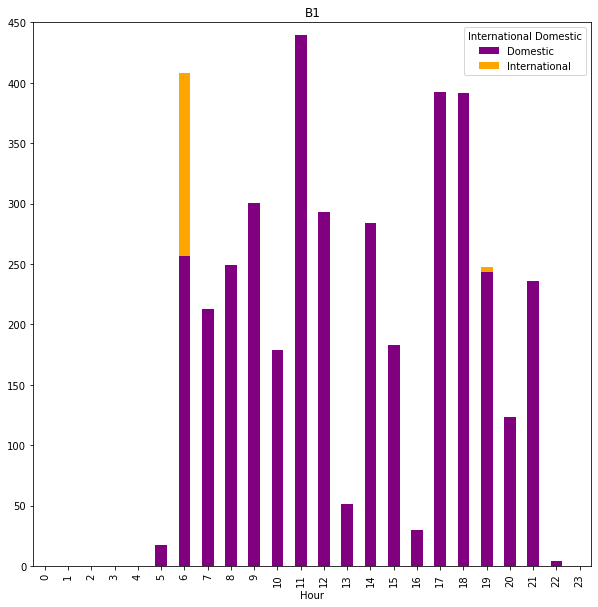

In [ ]:
b1.loc[:,'Estimated Passenger'].plot(kind='bar',stacked=True,figsize=(10,10), color = ['purple','orange'])
plt.ylim([0,450])
plt.title('B1')

The international flight in B1 is a daily flight to Cancun on Frontier. It usually departs from B1, but sometimes from B3.

Text(0.5, 1.0, 'B2')

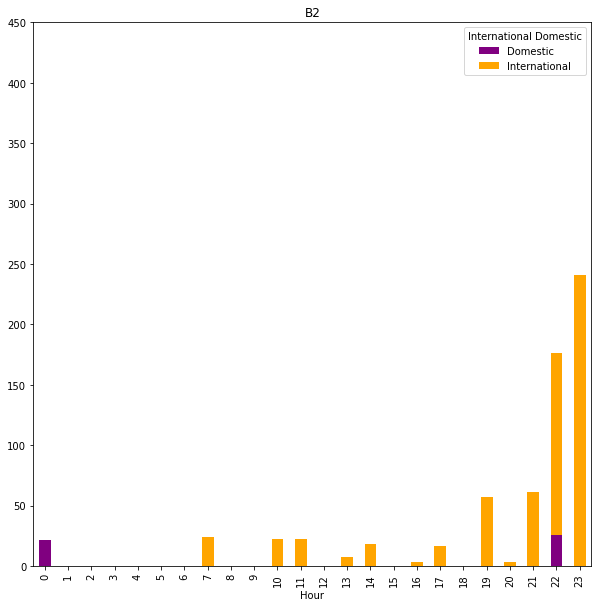

In [ ]:
b2.loc[:,'Estimated Passenger'].plot(kind='bar',stacked=True,figsize=(10,10), color = ['purple','orange'])
plt.ylim([0,450])
plt.title('B2')

Text(0.5, 1.0, 'B3')

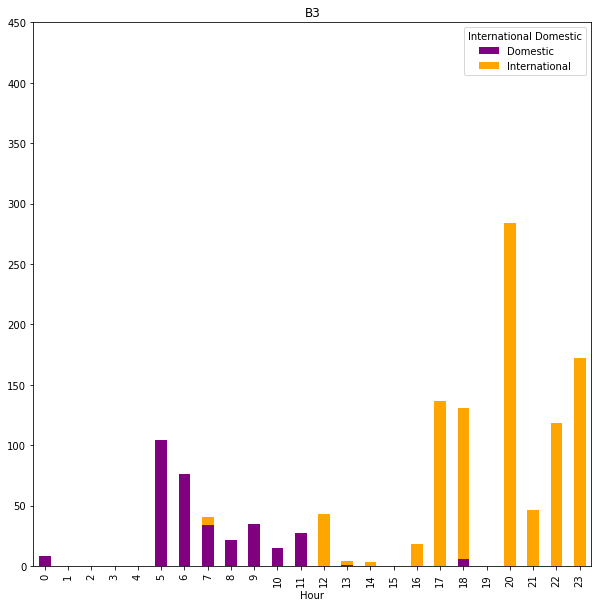

In [ ]:
b3.loc[:,'Estimated Passenger'].plot(kind='bar',stacked=True,figsize=(10,10), color = ['purple','orange'])
plt.ylim([0,450])
plt.title('B3')

In [ ]:
# For B1, what is the international flight at 6am?
fs9.loc[(fs9['Departure Concourse'] == 'B1') & (fs9['International Domestic'] == 'International'),:].head()

,Flight No,Dept_Date_Time,Departure Concourse,Time Category,Hour,Flight Date,DOW,Operating Airline Name,International Domestic,Arr Airport Code,Flight Distance,Seats,Estimated Passenger
11254,43,2021-09-01 06:14:00,B1,Morning,6,2021-09-01,2,Frontier Airlines,International,CUN,1546,186,152
11304,43,2021-09-02 06:14:00,B1,Morning,6,2021-09-02,3,Frontier Airlines,International,CUN,1546,186,152
11376,43,2021-09-03 06:48:00,B1,Morning,6,2021-09-03,4,Frontier Airlines,International,CUN,1546,186,152
11434,43,2021-09-04 06:14:00,B1,Morning,6,2021-09-04,5,Frontier Airlines,International,CUN,1546,186,152
11488,43,2021-09-05 06:48:00,B1,Morning,6,2021-09-05,6,Frontier Airlines,International,CUN,1546,186,152


In [ ]:
fs_con.loc[(fs_con['Operating Airline Name'] == 'Frontier Airlines') & (fs_con['Flight No'] == 43) & (fs_con['Flight Date'] == '2021-09-09'),:].head()

,Id,Flight Date,Flight Arrving Date Time,Flight Departing Date Time,Flight Date Time,Flight Arriving Time,Flight Departing Time,Date Hour Numeric,PA Time,Non-PA Time,Aircraft Id,Aircraft Code,Airline Id,ICAO Airline,Arriving from Airport Id,Departing to Airport Id,Dep Airport Code,Arr Airport Code,Context Airport Id,Non-Context Airport Id,State Id,Arr Terminal,Dep Terminal,Context Terminal,Flight Direction,Flight No,International Domestic,Mainline Low Cost,Service Type,Flight Type,Seats,Load Factor,Estimated Passenger,Flight Distance,Flight Duration,Valid Destination Indicator,Valid Carrier Indicator,Operating Airline Code,Operating Airline Name,TerminalId,Operating Airline Id,Flight Time,nonpaxratio,TSALoadFactor,Departure Concourse
11720,309056308,2021-09-09,2021-09-09T09:16:00.000Z,2021-09-09T06:14:00.000Z,2021-09-09T06:14:00.000Z,1900-01-01T09:16:00.000Z,1900-01-01T06:14:00.000Z,2021090906,1900-01-01T06:14:00.000Z,1900-01-01T09:16:00.000Z,6394,320,1974,FFT,92,116,EWR,CUN,116,92,-1,4,B,B,Departure,43,International,NaN,J,All Passenger Flights,186,0.818251,152,1546,242,1,1,F9,Frontier Airlines,10,1974,1900-01-01T06:14:00.000Z,NaN,NaN,Concourse B-1


In [ ]:
fs_con.loc[(fs_con['Operating Airline Name'] == 'Frontier Airlines') & (fs_con['Flight No'] == 43),'Departure Concourse'].value_counts()

Concourse B-1    144
Concourse B-3     73
Hard Stand        11
Name: Departure Concourse, dtype: int64

In [ ]:
fs9.head()

,Flight No,Dept_Date_Time,Departure Concourse,Time Category,Hour,Flight Date,DOW,Operating Airline Name,International Domestic,Arr Airport Code,Flight Distance,Seats,Estimated Passenger
11234,101,2021-09-01 19:00:00,B2,Evening,19,2021-09-01,2,La Compagnie,International,ORY,3648,76,62
11235,4870,2021-09-01 18:05:00,B1,Evening,18,2021-09-01,2,Endeavor Air,Domestic,DTW,488,76,37
11236,4987,2021-09-01 10:50:00,B1,Morning,10,2021-09-01,2,Endeavor Air,Domestic,CVG,569,76,37
11237,4857,2021-09-01 12:59:00,B1,Morning,12,2021-09-01,2,Endeavor Air,Domestic,DTW,488,76,37
11238,1529,2021-09-01 06:10:00,B1,Morning,6,2021-09-01,2,Delta Air Lines,Domestic,DTW,488,180,91


In [ ]:
fs9_d = fs9[['Departure Concourse','Operating Airline Name','Estimated Passenger']].groupby(['Departure Concourse','Operating Airline Name'],as_index=False).sum()
fs9_d

,Departure Concourse,Operating Airline Name,Estimated Passenger
0,B1,Delta Air Lines,19313
1,B1,Endeavor Air,3907
2,B1,Frontier Airlines,25495
3,B1,La Compagnie,124
4,B1,SkyWest Airlines,2516
5,B1,Spirit Airlines,69946
6,B2,Emirates,7223
7,B2,Ethiopian Airlines,1717
8,B2,French Bee,4521
9,B2,Frontier Airlines,1397


In [ ]:
fs9_d[fs9_d['Departure Concourse'] == 'B3']

,Departure Concourse,Operating Airline Name,Estimated Passenger
12,B3,Air India,1485
13,B3,Allegiant Air,1680
14,B3,Austrian Airlines,720
15,B3,El Al Israel Airlines,639
16,B3,Emirates,1112
17,B3,Frontier Airlines,635
18,B3,Icelandair,4317
19,B3,LOT Polish Airlines,3560
20,B3,Lufthansa German Airlines,6162
21,B3,SAS - Scandinavian Airlines Sys.,1392


In [ ]:
fs9_e = fs9_d.pivot(index=['Operating Airline Name'],columns = 'Departure Concourse',values = 'Estimated Passenger').fillna(0)
fs9_e

Departure Concourse,B1,B2,B3
Operating Airline Name,,,
Air India,0.0,0.0,1485.0
Allegiant Air,0.0,0.0,1680.0
Austrian Airlines,0.0,0.0,720.0
Delta Air Lines,19313.0,0.0,0.0
El Al Israel Airlines,0.0,0.0,639.0
Emirates,0.0,7223.0,1112.0
Endeavor Air,3907.0,0.0,0.0
Ethiopian Airlines,0.0,1717.0,0.0
French Bee,0.0,4521.0,0.0


In [ ]:
fs9_e.to_csv('airlinexconcourse.csv')

In [ ]:
fs9_f = fs9[['Departure Concourse','Arr Airport Code','Flight No']].groupby(['Departure Concourse','Arr Airport Code'],as_index=False).count().sort_values(['Departure Concourse','Flight No'],ascending=False)

In [ ]:
fs9_f[fs9_f['Departure Concourse'] == 'B3']

,Departure Concourse,Arr Airport Code,Flight No
41,B3,LIS,48
37,B3,FRA,30
32,B3,CPH,26
39,B3,KEF,24
45,B3,MUC,21
56,B3,ZRH,18
42,B3,MCO,17
36,B3,FLL,16
44,B3,MSP,16
34,B3,DEL,15


In [ ]:
fs9['Operating Airline Name'].value_counts()

Spirit Airlines                           511
Delta Air Lines                           223
Frontier Airlines                         206
Endeavor Air                              106
Porter Airlines                            76
SkyWest Airlines                           68
Lufthansa German Airlines                  56
Tap-Portuguese Airlines (TAP Portugal)     55
SAS - Scandinavian Airlines Sys.           43
Allegiant Air                              31
Emirates                                   30
Icelandair                                 24
La Compagnie                               21
Swiss International Airlines               18
Ethiopian Airlines                         17
LOT Polish Airlines                        17
Sun Country Airlines                       16
Air India                                  15
French Bee                                 14
Austrian Airlines                           6
El Al Israel Airlines                       3
Name: Operating Airline Name, dtyp

In [ ]:
fs9.loc[(fs9['Departure Concourse'] == 'B3') & (fs9['Operating Airline Name'] == 'Spirit Airlines'),'Arr Airport Code'].value_counts()

MCO    17
FLL    16
ATL     9
LAS     1
MYR     1
Name: Arr Airport Code, dtype: int64

## Temp